# Advent of code 2024

[[**Open the notebook in Colab**]](https://colab.research.google.com/github/hhoppe/advent_of_code/blob/main/2024/advent_of_code_2024.ipynb)

Jupyter [notebook](https://github.com/hhoppe/advent_of_code/blob/main/2024/advent_of_code_2024.ipynb)
with Python solutions to the
[2024 Advent of Code puzzles](https://adventofcode.com/2024),
completed in December 2024,
by [Hugues Hoppe](https://hhoppe.com/).

The notebook presents both "compact" and "fast" code versions, along with data visualizations.

For the fast solutions, the [cumulative time](#timings) across all 25 puzzles is less than 0.5 s on my PC.<br/>
(Some solutions use the `numba` package to jit-compile functions, which can take a few seconds.)

Here are some visualization results (obtained by setting `SHOW_BIG_MEDIA = True`):

<p>
<a href="#day4">day4</a>
 <img src="results/day04a.gif" width="216">&emsp;
<a href="#day6">day6</a>
 <img src="results/day06.gif" width="216">&emsp;
<a href="#day8">day8</a>
 <img src="results/day08.gif" width="216">
</p>

<p>
<a href="#day9">day9</a>
 <img src="results/day09.gif" width="210">&emsp;
<a href="#day12">day12</a>
 <img src="results/day12.gif" width="210">&emsp;
<a href="#day14">day14</a>
 <img src="results/day14b.gif" width="210">
</p>

<p>
<a href="#day15">day15</a>
 <img src="results/day15b.gif" width="440">&emsp;
<a href="#day16">day16</a>
 <img src="results/day16.gif" width="220">
</p>

<p>
<a href="#day18">day18</a>
 <img src="results/day18a.gif" width="220">&nbsp;
 <img src="results/day18b.gif" width="220">&emsp;
<a href="#day20">day20</a>
 <img src="results/day20.png" width="220">
</p>

<p>
<a href="#day23">day23</a>
 <img src="results/day23.png" width="420">&emsp;
<a href="#day24">day24</a>
 <img src="results/day24.png" width="250">
</p>

<p>
<a href="#day25">day25</a>
 <img src="results/day25.png" width="420">
</p>

<a name="preamble"></a>
## Preamble

In [1]:
!command -v ffmpeg >/dev/null || (apt-get -qq update && apt-get -qq -y install ffmpeg) >/dev/null  # For mediapy.

In [2]:
!dpkg -l | grep -q libgraphviz-dev || (apt-get -qq update && apt-get -qq -y install libgraphviz-dev) >/dev/null  # https://stackoverflow.com/a/66380001

In [3]:
!pip install -q advent-of-code-hhoppe hhoppe-tools matplotlib mediapy \
  more-itertools networkx numba numpy pygraphviz resampler scipy scikit-image sympy

In [4]:
import collections
from collections.abc import Iterator
import dataclasses
import functools
import heapq
import itertools
import math
import operator
import pathlib
import re
from typing import Any

import advent_of_code_hhoppe  # https://github.com/hhoppe/advent-of-code-hhoppe/blob/main/advent_of_code_hhoppe/__init__.py
import hhoppe_tools as hh  # https://github.com/hhoppe/hhoppe-tools/blob/main/hhoppe_tools/__init__.py
import matplotlib.patches
import matplotlib.pyplot as plt
import mediapy as media  # https://github.com/google/mediapy/blob/main/mediapy/__init__.py
import more_itertools
import networkx
import numba
import numpy as np
import resampler
import scipy.ndimage
import skimage.segmentation
import sympy

In [5]:
if not media.video_is_available():
  media.show_videos = lambda *a, **kw: print('Creating video is unavailable.')

In [6]:
if pathlib.Path('results').is_dir():
  media.set_show_save_dir('results')

In [7]:
hh.start_timing_notebook_cells()

In [8]:
YEAR = 2024
PROFILE = 'google.Hugues_Hoppe.965276'
# PROFILE = 'github.hhoppe.1452460'
SHOW_BIG_MEDIA = hh.get_env_bool('SHOW_BIG_MEDIA')
# echo 53616... >~/.config/aocd/token  # session cookie from "adventofcode.com" (valid 1 month).

In [9]:
TAR_URL = f'https://github.com/hhoppe/advent_of_code/raw/main/{YEAR}/data/{PROFILE}.tar.gz'
# TAR_URL = ''
advent = advent_of_code_hhoppe.Advent(year=YEAR, tar_url=TAR_URL)

In [10]:
hh.adjust_jupyterlab_markdown_width()

### Helper functions

In [11]:
check_eq = hh.check_eq

In [12]:
_ORIGINAL_GLOBALS = list(globals())

<a name="day1"></a>
## Day 1: Similarity of two lists

- Part 1: After sorting, what is the total distance between your lists?

- Part 2: Calculate a total similarity score by adding up each number in the left list after multiplying it by the number of times that number appears in the right list.  What is the score?

In [13]:
puzzle = advent.puzzle(day=1)

For [day 1](https://adventofcode.com/2024/day/1), `puzzle.input` has 1_000 lines:

39687   54930
86219   31559
48536   73145
19932   82178
87646   97411
18305   78515
60437   30432
35451   49981
 ...
12914   79531
39621   90125
10029   95431
85400   15291


The stored answers are: `{1: '1651298', 2: '21306195'}`

In [14]:
s1 = """\
3   4
4   3
2   5
1   3
3   9
3   3
"""

In [15]:
def day1a(s, *, part2=False):  # Clever L1 norm, but not as concise.
  columns = np.array([line.split() for line in s.splitlines()], int).T

  if not part2:
    columns.sort()
    return np.linalg.norm(columns[0] - columns[1], ord=1).astype(int)

  counts = collections.Counter(columns[1])
  return sum(value * counts[value] for value in columns[0])


check_eq(day1a(s1), 11)
puzzle.verify(1, day1a)

day1a_part2 = functools.partial(day1a, part2=True)
check_eq(day1a_part2(s1), 31)
puzzle.verify(2, day1a_part2)

(Part 1: 0.000 s)
(Part 2: 0.001 s)


In [16]:
def day1(s, *, part2=False):
  columns = np.array([line.split() for line in s.splitlines()], int).T

  if not part2:
    return abs(np.diff(np.sort(columns), axis=0)).sum()

  counts = collections.Counter(columns[1])
  return sum(value * counts[value] for value in columns[0])


check_eq(day1(s1), 11)
puzzle.verify(1, day1)

day1_part2 = functools.partial(day1, part2=True)
check_eq(day1_part2(s1), 31)
puzzle.verify(2, day1_part2)

(Part 1: 0.001 s)
(Part 2: 0.001 s)


<a name="day2"></a>
## Day 2: Count monotonic lists

- Part 1: How many lists are either all increasing or all decreasing and have any two adjacent levels differ by at least one and at most three?

- Part 2: Tolerate a single bad level.  How many lists are now safe?

In [17]:
puzzle = advent.puzzle(day=2)

For [day 2](https://adventofcode.com/2024/day/2), `puzzle.input` has 1_000 lines:

51 54 57 60 61 64 67 64
54 56 57 58 60 60
41 44 45 46 48 50 54
62 64 67 69 72 79
57 58 61 62 63 61 64
81 84 82 84 87 85
15 17 15 16 16
82 85 87 85 87 91
 ...
18 20 23 24 26 28 31
89 87 85 82 81 80 77
95 93 91 88 87 85
48 49 52 55 57 58 60 62


The stored answers are: `{1: '224', 2: '293'}`

In [18]:
s1 = """\
7 6 4 2 1
1 2 7 8 9
9 7 6 2 1
1 3 2 4 5
8 6 4 4 1
1 3 6 7 9
"""

In [19]:
def day2a(s, part2=False):  # Using np.diff().
  def safe(values):
    diff = np.diff(values)
    return ((diff >= 1) & (diff <= 3)).all() or ((diff >= -3) & (diff <= -1)).all()

  def check(values):
    return safe(values) or (
        part2 and any(safe(values[:i] + values[i + 1 :]) for i in range(len(values)))
    )

  return sum(check(list(map(int, line.split()))) for line in s.splitlines())


check_eq(day2a(s1), 2)
puzzle.verify(1, day2a)

day2a_part2 = functools.partial(day2a, part2=True)
check_eq(day2a_part2(s1), 4)
puzzle.verify(2, day2a_part2)

(Part 1: 0.008 s)
(Part 2: 0.042 s)


In [20]:
def day2(s, part2=False):  # Fastest, using Python lists.
  def safe(values):
    diff = [b - a for a, b in itertools.pairwise(values)]
    return all(1 <= d <= 3 for d in diff) or all(-3 <= d <= -1 for d in diff)

  def check(values):
    return safe(values) or (
        part2 and any(safe(values[:i] + values[i + 1 :]) for i in range(len(values)))
    )

  return sum(check(list(map(int, line.split()))) for line in s.splitlines())


check_eq(day2(s1), 2)
puzzle.verify(1, day2)

day2_part2 = functools.partial(day2, part2=True)
check_eq(day2_part2(s1), 4)
puzzle.verify(2, day2_part2)

(Part 1: 0.001 s)
(Part 2: 0.007 s)


<a name="day3"></a>
## Day 3: String expressions

- Part 1: What do you get if you add up all of the results of the `mul(x,y)` multiplications?

- Part 2: Handle the new `do()` and `don't()` instructions; what do you get if you add up all of the results of just the enabled multiplications?

In [21]:
puzzle = advent.puzzle(day=3)

For [day 3](https://adventofcode.com/2024/day/3), `puzzle.input` has 6 lines:

where())what()@)select()why()?mul(371,776)/%how()'~+:how()mul(977,266)@$@mul(749 ... :]mul(602,333){what()[[mul(606,272)
,who()>}who():#from()mul(960,322)where()'<from()why()what()%where()mul(282,700)m ... 5)*who()mul(227,178)} !mul(256,394)
mul(888,165);]~mul(93,961)do();where(449,598)*-& #mul(364,267)how()what()where() ... /usr/bin/perl[@'/?~&>?>mul(780,897)
/,mul(904,917)how()from()] :%where()why(824,519)$}mul(433,689)-/{where()%>how()m ... )mul(999,210)?]$*,?]-$,mul(661,825)
from()<#from()[@>?$(mul(631,608),+mul(946,420),( (^[^+/{mul(569,409),what()who() ... (),-%+:# from(872,943)}mul(782,821)
!>mul(851,461)+!where()$!{@!:)mul(93,494):!mul(951,143)+>)why()-{from()what()mul ... ,639)~$),who(575,232),%mul(671,828)


The stored answers are: `{1: '169021493', 2: '111762583'}`

In [22]:
s1 = 'xmul(2,4)%&mul[3,7]!@^do_not_mul(5,5)+mul(32,64]then(mul(11,8)mul(8,5))'
s2 = "xmul(2,4)&mul[3,7]!^don't()_mul(5,5)+mul(32,64](mul(11,8)undo()?mul(8,5))"

In [23]:
def day3a(s, *, part2=False):  # Concise.
  total = 0
  enable = True
  while s:
    pattern_mul = r'^mul\((\d{1,3}),(\d{1,3})\)'
    if enable and (match := re.match(pattern_mul, s)):
      total += int(match[1]) * int(match[2])
    if s.startswith('do()'):
      enable = True
    if s.startswith("don't()") and part2:
      enable = False
    s = s[1:]

  return total


check_eq(day3a(s1), 161)
puzzle.verify(1, day3a)

day3a_part2 = functools.partial(day3a, part2=True)
check_eq(day3a_part2(s2), 48)
puzzle.verify(2, day3a_part2)

(Part 1: 0.013 s)
(Part 2: 0.011 s)


In [24]:
def day3b(s, *, part2=False):  # Faster.
  total = 0
  enable = True

  for start, ch in enumerate(s):
    match ch:
      case 'm':
        pattern_mul = r'^mul\((\d{1,3}),(\d{1,3})\)'
        if enable and (match := re.match(pattern_mul, s[start:])):
          total += int(match[1]) * int(match[2])
      case 'd':
        if s[start:].startswith('do()'):
          enable = True
        if s[start:].startswith("don't()") and part2:
          enable = False

  return total


check_eq(day3b(s1), 161)
puzzle.verify(1, day3b)

day3b_part2 = functools.partial(day3b, part2=True)
check_eq(day3b_part2(s2), 48)
puzzle.verify(2, day3b_part2)

(Part 1: 0.002 s)
(Part 2: 0.001 s)


In [25]:
def day3(s, *, part2=False):  # Fastest.
  total = 0
  enable = True
  pattern = re.compile(r"mul\((\d{1,3}),(\d{1,3})\)|do\(\)|don't\(\)")

  while match := pattern.search(s):
    if match[0] == 'do()':
      enable = True
    elif match[0] == "don't()":
      enable = False
    elif enable or not part2:
      total += int(match[1]) * int(match[2])
    s = s[match.end() :]

  return total


check_eq(day3(s1), 161)
puzzle.verify(1, day3)

day3_part2 = functools.partial(day3, part2=True)
check_eq(day3_part2(s2), 48)
puzzle.verify(2, day3_part2)

(Part 1: 0.001 s)
(Part 2: 0.001 s)


<a name="day4"></a>
## Day 4: Find XMAS in a 2D grid

- Part 1: How many times does `XMAS` appear in the grid (in all 8 directions)?

- Part 2: How many times does the 3x3 pattern with two diagonal crossing `MAS` appear in the grid?

---

Using a vectorized `numpy` implementation is significantly faster than nested Python `for` loops.

In [26]:
puzzle = advent.puzzle(day=4)

For [day 4](https://adventofcode.com/2024/day/4), `puzzle.input` has 140 lines:

SMXMMAXXXXMMMMSMMASASMSXMMAMSSMXSMMXMASAMXXMAMXAXXAMXAXASMSMSMMMSXXSXSXXAAMXXSXM ... XXMASXMMSMSXMXSSMXSMMMSXMSAMSASXSAM
MASMMSXMMMMAMSMAXSAMXAXAXXAXSASAMASMMASAMAXMAXMMSXASMMMMSAAXAAAAXSMAAAAMAMXSSMMX ... XMXAXASAASXASAXMASMAAXXAXMAMXXSSMAM
MAMAAMXMAXSASAMMMXAMMMMAMMSMSAMXSAMXMASAMMSXSASAMXSMAAAMMXMMSMMXMAMSSMMAAMAMAXAA ... XSMMSXMSMMSAMXSXMXXMMSSMMMSMMXMASXM
MAMMMXAMXMXXSASXAXAMSXMXSAAXMMMXMXSXMXSMMXMAXAMXXXXXSSSSXAMXXAMMAMXAXAXSAMMSMMMS ... SMAXSAMXMMMSXAXAXAMMXMASXAMAMSXAMMX
SSSXXSMMSMMXSAAMSSSMMXSAMMSMMMMMMASASAMASMMMMXSSSSMXMAMMMXSASAMXXXSXMMMMASXAXASA ... XMAMMXAAXMAMMSSMMXXAASAMMXSAMAMSSMM
AAXMASMAAASAMXMAMMAAXXMASAXXMAAAXMSAMXSAMAMXSAAAAXAAMAMAAXAMMMMSMAXMXSASAMMMMMAA ... ASXMSASMSMMMMMAXAAXSXMASAMSAMMXMAMA
MXMMAMASMMMXSXSASXSMMMMXMMSASMSMSAMXMXMMSSMAXMMMMMSXSASMSSMXXAAAMAMXMAMMAMXXAXSX ... AXXAAXXAAMAAXSMMMSMMAMMXXAMAMXMSMMS
MMXMAXXMMMAXMXMASXAXAAMMMMSAMXAMXMMAMXMMAAMXSXMXAAAASASAAXXSSMSSSMSSMSMSXMXXSXMX ... MMMSMMMSMXMSMMXMXMAMMMSMMSSXMAAAXAM
 ...
XMMXMAXXMXSASXSAMXXSXMASXSM

The stored answers are: `{1: '2543', 2: '1930'}`

In [27]:
s1 = """\
MMMSXXMASM
MSAMXMSMSA
AMXSXMAAMM
MSAMASMSMX
XMASAMXAMM
XXAMMXXAMA
SMSMSASXSS
SAXAMASAAA
MAMMMXMMMM
MXMXAXMASX
"""

In [28]:
def day4a(s, part2=False):  # Using nested Python `for` loops.
  a = np.array([list(line) for line in s.splitlines()])
  count = 0

  for _ in range(4):
    a = np.rot90(a)

    if not part2:
      for y in range(a.shape[0]):
        for x in range(a.shape[1] - 3):
          count += (a[y, x], a[y, x + 1], a[y, x + 2], a[y, x + 3]) == tuple('XMAS')
      for y in range(a.shape[0] - 3):
        for x in range(a.shape[1] - 3):
          count += (a[y, x], a[y + 1, x + 1], a[y + 2, x + 2], a[y + 3, x + 3]) == tuple('XMAS')

    else:
      for y in range(a.shape[0] - 2):
        for x in range(a.shape[1] - 2):
          t = a[y, x], a[y, x + 2], a[y + 1, x + 1], a[y + 2, x], a[y + 2, x + 2]
          count += t == tuple('MMASS')

  return count


check_eq(day4a(s1), 18)
puzzle.verify(1, day4a)

day4a_part2 = functools.partial(day4a, part2=True)
check_eq(day4a_part2(s1), 9)
puzzle.verify(2, day4a_part2)

(Part 1: 0.101 s)
(Part 2: 0.065 s)


In [29]:
def day4(s, part2=False):  # Using vectorized `numpy`.
  grid = np.array([list(line) for line in s.splitlines()])
  count = 0

  for _ in range(4):
    grid = np.rot90(grid)
    if not part2:
      g0, g1, g2, g3 = grid[:-3], grid[1:-2], grid[2:-1], grid[3:]
      count += ((g0 == 'X') & (g1 == 'M') & (g2 == 'A') & (g3 == 'S')).sum()
      g0, g1, g2, g3 = grid[:-3, :-3], grid[1:-2, 1:-2], grid[2:-1, 2:-1], grid[3:, 3:]
      count += ((g0 == 'X') & (g1 == 'M') & (g2 == 'A') & (g3 == 'S')).sum()
    else:
      g0, g1, g2 = grid[:-2, :-2], grid[:-2, 2:], grid[1:-1, 1:-1]
      g3, g4 = grid[2:, :-2], grid[2:, 2:]
      count += ((g0 == 'M') & (g1 == 'M') & (g2 == 'A') & (g3 == 'S') & (g4 == 'S')).sum()

  return count


check_eq(day4(s1), 18)
puzzle.verify(1, day4)

day4_part2 = functools.partial(day4, part2=True)
check_eq(day4_part2(s1), 9)
puzzle.verify(2, day4_part2)

(Part 1: 0.005 s)
(Part 2: 0.004 s)


day04a

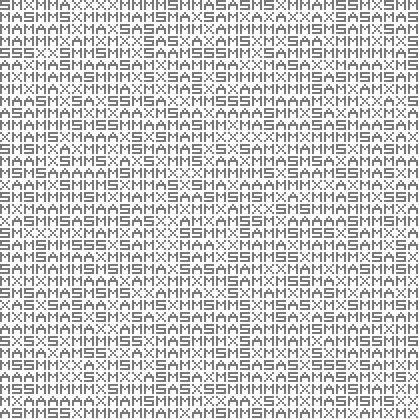

day04b

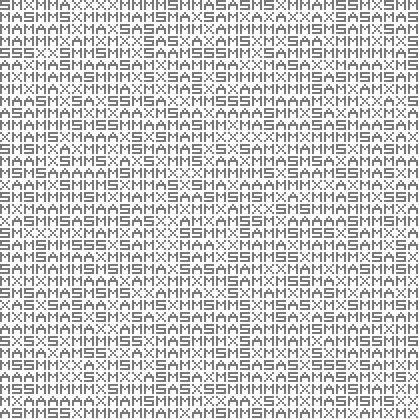

In [30]:
def day4_visualize(s, part2=False, rep=2, t1=0.25, t2=2.0, crop=True):
  grid = np.array([list(line) for line in s.splitlines()])
  s_font = """\
  - O   O O   O   O   OOOOO -
  -  O O  OO OO  O O  O     -
  -   O   O O O OOOOO OOOOO -
  -  O O  O   O O   O     O -
  - O   O O   O O   O OOOOO -
  -                         -
  """
  chars = np.array([list(line.strip()) for line in s_font.rstrip(' ').splitlines()])[:, 2:-1]
  font = dict(zip('XMAS', [a != ' ' for a in np.split(chars, 4, axis=1)]))
  h = font['X'].shape[0]
  assert h == font['X'].shape[1]
  raster = np.vstack([np.hstack([font[ch] for ch in row]) for row in grid])[:-1, :-1]
  image = hh.to_image(raster, 255, 120).repeat(rep, 0).repeat(rep, 1)
  images = []

  def add_image():
    image2 = image.copy()
    if crop:
      image2 = image2[: image2.shape[0] // 4, : image2.shape[1] // 4]
    images.append(image2)

  add_image()
  for k in range(4):
    grid2 = np.rot90(grid, k)
    image2 = np.rot90(image, k)
    # The center of the font character is at pixel (2, 2) within the (h, h)-sized font.
    if not part2:
      f = lambda y, x: ((x * h + 2.0 + 0.5) * rep - 0.5, (y * h + 2.0 + 0.5) * rep - 0.5)
      g0, g1, g2, g3 = grid2[:-3], grid2[1:-2], grid2[2:-1], grid2[3:]
      mask = (g0 == 'X') & (g1 == 'M') & (g2 == 'A') & (g3 == 'S')
      with hh.pil_draw(image2) as draw:
        for y, x in np.argwhere(mask):
          draw.line([f(y - t1, x), f(y + 3 + t1, x)], fill=(255, 0, 0), width=rep)
      add_image()
      g0, g1, g2, g3 = grid2[:-3, :-3], grid2[1:-2, 1:-2], grid2[2:-1, 2:-1], grid2[3:, 3:]
      mask = (g0 == 'X') & (g1 == 'M') & (g2 == 'A') & (g3 == 'S')
      with hh.pil_draw(image2) as draw:
        for y, x in np.argwhere(mask):
          draw.line([f(y - t1, x - t1), f(y + 3 + t1, x + 3 + t1)], fill=(0, 0, 255), width=rep)
      add_image()
    else:
      g0, g1, g2 = grid2[:-2, :-2], grid2[:-2, 2:], grid2[1:-1, 1:-1]
      g3, g4 = grid2[2:, :-2], grid2[2:, 2:]
      mask = (g0 == 'M') & (g1 == 'M') & (g2 == 'A') & (g3 == 'S') & (g4 == 'S')
      with hh.pil_draw(image2) as draw:
        for y, x in np.argwhere(mask) + 1:
          # The drawn rectangle() is inclusive of both corner points (x1, y1) and (x2, y2).
          x1, y1 = (x * h + 2.0 + 0.5 - t2) * rep - 0.5, (y * h + 2.0 + 0.5 - t2) * rep - 0.5
          x2, y2 = (x * h + 2.0 + 0.5 + t2) * rep + 0.499, (y * h + 2.0 + 0.5 + t2) * rep + 0.499
          # draw.rectangle(((x1, y1), (x2, y2)), fill=(255, 0, 0))
          draw.rectangle(((x1, y1), (x2, y2)), outline=(255, 0, 0), width=rep)

  if part2:
    add_image()

  title = 'day04b' if part2 else 'day04a'
  images = [images[0]] * 1 + images + [images[-1]] * 3
  media.show_video(images, codec='gif', fps=2, title=title)


if 0:
  day4_visualize(s1, rep=6, crop=False)
  day4_visualize(s1, part2=True, rep=6, crop=False)
day4_visualize(puzzle.input)
day4_visualize(puzzle.input, part2=True)

<a name="day5"></a>
## Day 5: Lexicographic ordering

- Part 1: Given the page ordering rules in the first part, what do you get if you add up the middle page number from those correctly-ordered updates?

- Part 2: Find the updates which are not in the correct order. What do you get if you add up the middle page numbers after correctly ordering just those updates?

In [31]:
puzzle = advent.puzzle(day=5)

For [day 5](https://adventofcode.com/2024/day/5), `puzzle.input` has 1_374 lines:

96|15
69|95
69|66
41|61
41|26
41|28
66|75
66|96
 ...
18,92,26,48,51,67,91,34,69,93,42,86,17,62,58,66,79,39,96
96,15,65,63,12,25,46,11,95,99,61,82,89,85,24,52,88
42,91,93,65,63,17,72,51,19,79,83,69,41
24,61,67,52,11,36,99,85,53,82,51


The stored answers are: `{1: '4569', 2: '6456'}`

In [32]:
s1 = """\
47|53
97|13
97|61
97|47
75|29
61|13
75|53
29|13
97|29
53|29
61|53
97|53
61|29
47|13
75|47
97|75
47|61
75|61
47|29
75|13
53|13

75,47,61,53,29
97,61,53,29,13
75,29,13
75,97,47,61,53
61,13,29
97,13,75,29,47
"""

In [33]:
def day5(s, part2=False):
  p1, p2 = s.split('\n\n')
  rules = {tuple(line.split('|')) for line in p1.splitlines()}
  updates = (line.split(',') for line in p2.splitlines())

  def compare(a, b):
    return -1 if (a, b) in rules else 1 if (b, a) in rules else 0

  total = 0
  for update in updates:
    new = sorted(update, key=functools.cmp_to_key(compare))
    if (new == update) ^ part2:
      total += int(new[len(new) // 2])

  return total


check_eq(day5(s1), 143)
puzzle.verify(1, day5)

day5_part2 = functools.partial(day5, part2=True)
check_eq(day5_part2(s1), 123)
puzzle.verify(2, day5_part2)

(Part 1: 0.001 s)
(Part 2: 0.001 s)


<a name="day6"></a>
## Day 6: Walk in a 2D grid

- Part 1: A guard advances straight but turns right when hitting an obstacle.  How many distinct positions will the guard visit before leaving the mapped area?

- Part 2: You need to get the guard stuck in a loop by adding a single new obstruction. How many different positions could you choose for this obstruction?

In [13]:
puzzle = advent.puzzle(day=6)

For [day 6](https://adventofcode.com/2024/day/6), `puzzle.input` has 130 lines:

...#..................#...................#......................#.............. ... .#.............................#...
....#.......................#........#.#..............##...........#.....#...... ... ................#..................
.............#.................................................................. ... .#.#..#..#..........#..............
..........#.......#..........#..................#........##...................#. ... ...................................
....................#..........................................................# ... .........................#.........
....#............................#.............................................. ... .......#..........##....#..........
.......#.............#.......................................................... ... ...........#.........#.............
....###......................#....#...........#.....#........................... ... .................#.................
 ...
..#.......#......#.........

The stored answers are: `{1: '4433', 2: '1516'}`

In [14]:
s1 = """\
....#.....
.........#
..........
..#.......
.......#..
..........
.#..^.....
........#.
#.........
......#...
"""

In [15]:
def day6a_part1(s):  # Concise.
  grid = np.array([list(line) for line in s.splitlines()])
  ((y, x),) = np.argwhere(grid == '^')
  dy, dx = -1, 0
  while True:
    grid[y, x] = 'X'
    y1, x1 = y + dy, x + dx
    if not (0 <= y1 < grid.shape[0] and 0 <= x1 < grid.shape[1]):
      break
    if grid[y1, x1] == '#':
      dy, dx = dx, -dy
      continue
    y, x = y1, x1

  return (grid == 'X').sum()


check_eq(day6a_part1(s1), 41)
puzzle.verify(1, day6a_part1)

(Part 1: 0.005 s)


In [16]:
def day6a_part2(s):  # Brute-force, slow.
  grid = np.array([list(line) for line in s.splitlines()])
  ((y0, x0),) = np.argwhere(grid == '^')
  count = 0

  for obstacle_yx, ch in np.ndenumerate(grid):
    if ch == '.':
      y, x, dy, dx = y0, x0, -1, 0
      grid[obstacle_yx] = '#'
      visited = set()
      while True:
        y1, x1 = y + dy, x + dx
        if not (0 <= y1 < grid.shape[0] and 0 <= x1 < grid.shape[1]):
          break
        if grid[y1, x1] == '#':
          state = y1, x1, dy, dx
          if state in visited:
            count += 1
            break
          visited.add(state)
          dy, dx = dx, -dy
          continue
        y, x = y1, x1

      grid[obstacle_yx] = '.'

  return count


check_eq(day6a_part2(s1), 6)
# puzzle.verify(2, day6a_part2)  # ~31 s.

In [17]:
def day6b(s, part2=False):  # Faster with precomputed jumps.
  grid = np.array([list(line) for line in s.splitlines()])
  ((y0, x0),) = np.argwhere(grid == '^')
  big = max(grid.shape)
  dydx_from_dir = (0, -1), (-1, 0), (0, 1), (1, 0)

  y, x, dy, dx = y0, x0, -1, 0
  while True:
    grid[y, x] = 'X'
    y1, x1 = y + dy, x + dx
    if not (0 <= y1 < grid.shape[0] and 0 <= x1 < grid.shape[1]):
      break
    if grid[y1, x1] == '#':
      dy, dx = dx, -dy  # Rotate clockwise.
    else:
      y, x = y1, x1

  if not part2:
    return (grid == 'X').sum()

  jump_steps = np.empty((4, *grid.shape), int)
  for dir in range(4):
    rotated_grid = np.rot90(grid, k=dir)
    rotated_jump_steps = np.rot90(jump_steps[dir], k=dir)
    for y, row in enumerate(rotated_grid):
      num = big
      for x, ch in enumerate(row):
        num = -1 if ch == '#' else num + 1
        rotated_jump_steps[y, x] = num

  grid[y0, x0] = '^'
  count = 0
  for (obstacle_y, obstacle_x), ch in np.ndenumerate(grid):
    if ch == 'X':  # Candidate obstacle locations must lie on the original path.
      y, x, dir = y0, x0, 1
      visited = set()
      while True:
        dy, dx = dydx_from_dir[dir]
        steps = jump_steps[dir, y, x]
        if obstacle_y == y and (d := obstacle_x - x) * dx > 0:
          steps = min(steps, abs(d) - 1)
        if obstacle_x == x and (d := obstacle_y - y) * dy > 0:
          steps = min(steps, abs(d) - 1)
        if steps >= big:
          break
        y, x = y + dy * steps, x + dx * steps
        state = y, x, dir
        if state in visited:
          count += 1
          break
        visited.add(state)
        dir = (dir + 1) % 4  # Rotate clockwise.

  return count


check_eq(day6b(s1), 41)
puzzle.verify(1, day6b)

day6b_part2 = functools.partial(day6b, part2=True)
check_eq(day6b_part2(s1), 6)
puzzle.verify(2, day6b_part2)

(Part 1: 0.005 s)
(Part 2: 0.172 s)


In [18]:
# @numba.njit  # Slow jit (> 10 s).
def day6c_jit(grid: np.ndarray, y0: int, x0: int, part2: bool) -> int:
  y, x, dy, dx = y0, x0, -1, 0
  count = 0
  while True:
    if grid[y, x] != 'X':
      count += 1
    grid[y, x] = 'X'
    y1, x1 = y + dy, x + dx
    if not (0 <= y1 < grid.shape[0] and 0 <= x1 < grid.shape[1]):
      break
    if grid[y1, x1] == '#':
      dy, dx = dx, -dy  # Rotate clockwise.
    else:
      y, x = y1, x1

  if not part2:
    return count

  big = max(grid.shape)
  jump_steps = np.empty((4, *grid.shape), np.int32)
  for dir in range(4):
    rotated_grid = np.rot90(grid, k=dir)
    rotated_jump_steps = np.rot90(jump_steps[dir], k=dir)
    for y, row in enumerate(rotated_grid):
      num = big
      for x, ch in enumerate(row):
        num = -1 if ch == '#' else num + 1
        rotated_jump_steps[y, x] = num

  grid[y0, x0] = '^'
  dydx_from_dir = (0, -1), (-1, 0), (0, 1), (1, 0)
  count = 0
  for (obstacle_y, obstacle_x), ch in np.ndenumerate(grid):
    if ch == 'X':  # Candidate obstacle locations must lie on the original path.
      y, x, dir = y0, x0, 1
      visited = set()
      while True:
        dy, dx = dydx_from_dir[dir]
        steps = jump_steps[dir, y, x]
        if obstacle_y == y:
          d = obstacle_x - x
          if d * dx > 0:
            steps = min(steps, abs(d) - 1)
        if obstacle_x == x:
          d = obstacle_y - y
          if d * dy > 0:
            steps = min(steps, abs(d) - 1)
        if steps >= big:
          break
        y, x = y + dy * steps, x + dx * steps
        state = y, x, dir
        if state in visited:
          count += 1
          break
        visited.add(state)
        dir = (dir + 1) % 4  # Rotate clockwise.

  return count


def day6c(s, part2=False):
  grid = np.array([list(line) for line in s.splitlines()])
  ((y0, x0),) = np.argwhere(grid == '^')
  return day6c_jit(grid, y0, x0, part2)


check_eq(day6c(s1), 41)
puzzle.verify(1, day6c)

day6c_part2 = functools.partial(day6c, part2=True)
check_eq(day6c_part2(s1), 6)
puzzle.verify(2, day6c_part2)  # (~12 ms if jit re-enabled.)

(Part 1: 0.006 s)
(Part 2: 0.222 s)


In [19]:
# For Part 2, (1) precompute a jump map and (2) march along the path and look for a possible loop
# (by inserting an obstacle) only when encountering an empty space for the first time.
@numba.njit
def day6_jit(grid: np.ndarray, y0: int, x0: int, part2: bool) -> int:
  big = max(grid.shape)
  dydx_from_dir = (0, -1), (-1, 0), (0, 1), (1, 0)
  jump_steps = np.empty((4, *grid.shape), np.int32)
  if part2:
    for dir in range(4):
      rotated_grid = np.rot90(grid, k=dir)
      rotated_jump_steps = np.rot90(jump_steps[dir], k=dir)
      for y, row in enumerate(rotated_grid):
        num = big
        for x, ch in enumerate(row):
          num = -1 if ch == '#' else num + 1
          rotated_jump_steps[y, x] = num

  def adding_obstacle_would_create_loop(y, x, dir, obstacle_y, obstacle_x):
    visited = set()
    while True:
      dy, dx = dydx_from_dir[dir]
      steps = jump_steps[dir, y, x]
      if obstacle_y == y:
        d = obstacle_x - x
        if d * dx > 0:
          steps = min(steps, abs(d) - 1)
      if obstacle_x == x:
        d = obstacle_y - y
        if d * dy > 0:
          steps = min(steps, abs(d) - 1)
      if steps >= big:
        return False
      y, x = y + dy * steps, x + dx * steps
      state = y, x, dir
      if state in visited:
        return True
      visited.add(state)
      dir = (dir + 1) % 4  # Rotate clockwise.

  y, x, dir = y0, x0, 1
  count = 0
  while True:
    if not part2 and grid[y, x] != 'X':
      grid[y, x] = 'X'
      count += 1
    dy, dx = dydx_from_dir[dir]
    y1, x1 = y + dy, x + dx
    if not (0 <= y1 < grid.shape[0] and 0 <= x1 < grid.shape[1]):
      break
    if grid[y1, x1] == '#':
      dir = (dir + 1) % 4  # Rotate clockwise.
    else:
      if part2 and grid[y1, x1] == '.':
        grid[y1, x1] = 'Y'
        count += adding_obstacle_would_create_loop(y, x, dir, y1, x1)
      y, x = y1, x1

  return count


def day6(s, part2=False):
  grid = np.array([list(line) for line in s.splitlines()])
  ((y0, x0),) = np.argwhere(grid == '^')
  return day6_jit(grid, y0, x0, part2)


check_eq(day6(s1), 41)
puzzle.verify(1, day6)

day6_part2 = functools.partial(day6, part2=True)
check_eq(day6_part2(s1), 6)
puzzle.verify(2, day6_part2)  # ~7 ms (~92 ms without numba), but ~10 s jit time!

(Part 1: 0.002 s)
(Part 2: 0.007 s)


day06

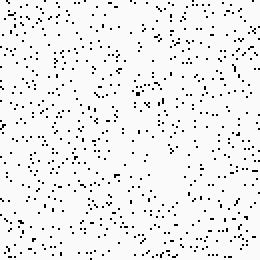

In [25]:
def day6_visualize(s, rep=2, fps=50):
  grid = np.array([list(line) for line in s.splitlines()])
  ((y0, x0),) = np.argwhere(grid == '^')
  big = max(grid.shape)
  dydx_from_dir = (0, -1), (-1, 0), (0, 1), (1, 0)
  image = hh.to_image(grid == '#', 250, 0)
  images = []

  jump_steps = np.empty((4, *grid.shape), int)
  for dir in range(4):
    rotated_grid = np.rot90(grid, k=dir)
    rotated_jump_steps = np.rot90(jump_steps[dir], k=dir)
    for y, row in enumerate(rotated_grid):
      num = big
      for x, ch in enumerate(row):
        num = -1 if ch == '#' else num + 1
        rotated_jump_steps[y, x] = num

  def add_image():
    images.append(image.repeat(rep, 0).repeat(rep, 1))

  def adding_obstacle_would_create_loop(y, x, dir, obstacle_y, obstacle_x):
    visited = set()
    while True:
      dy, dx = dydx_from_dir[dir]
      steps = jump_steps[dir, y, x]
      if obstacle_y == y and (d := obstacle_x - x) * dx > 0:
        steps = min(steps, abs(d) - 1)
      if obstacle_x == x and (d := obstacle_y - y) * dy > 0:
        steps = min(steps, abs(d) - 1)
      if steps >= big:
        return False
      y, x = y + dy * steps, x + dx * steps
      state = y, x, dir
      if state in visited:
        return True
      visited.add(state)
      dir = (dir + 1) % 4  # Rotate clockwise.

  y, x, dir = y0, x0, 1
  # See also 2017 day22b().
  time_sim, time_current, time_interval, time_accel = 0, 0.0, 0.5, 0.005
  add_image()
  done = False

  while not done:
    time_current += time_interval
    time_interval += time_accel
    num_steps = int(time_current - time_sim)
    for _ in range(num_steps):
      time_sim += 1
      image[y, x] = image[y, x] * (150, 150, 255) / 255
      dy, dx = dydx_from_dir[dir]
      y1, x1 = y + dy, x + dx
      if not (0 <= y1 < grid.shape[0] and 0 <= x1 < grid.shape[1]):
        done = True
        break
      if grid[y1, x1] == '#':
        dir = (dir + 1) % 4  # Rotate clockwise.
      else:
        if grid[y1, x1] == '.':
          grid[y1, x1] = 'Y'
          if adding_obstacle_would_create_loop(y, x, dir, y1, x1):
            image[y1, x1] = 255, 0, 0
        y, x = y1, x1

    add_image()

  images = [images[0]] * (fps // 2) + images + [images[-1]] * int(fps * 2.5)
  media.show_video(images, codec='gif', fps=fps, title='day06')


if 0:
  day6_visualize(s1, rep=10, fps=5)
day6_visualize(puzzle.input)

<a name="day7"></a>
## Day 7: All operations on numbers

- Part 1: What is the sum of desired values that can be expressed by inserting operators `+` or `*` between the associated list of values?

- Part 2: What is the sum of desired values if an additional operator of "string concatenation" is allowed?

In [42]:
puzzle = advent.puzzle(day=7)

For [day 7](https://adventofcode.com/2024/day/7), `puzzle.input` has 850 lines:

25056746772: 4 47 136 21 79 49
3790126111: 371 8 10 125 325 788
37542888: 3 977 944 5
785818128: 1 8 5 9 4 73 5 7 860 7
19035366: 37 41 1 42 555 9 366
1387: 33 502 69 775 5
59640870978: 1 68 355 870 9 78
10960521957: 7 369 8 6 4 1 5 23 53 5 9
 ...
54563: 35 41 1 938 6 32
397562: 331 7 1 58 560
253371140108: 57 889 582 646 5 108
2905189: 72 1 6 2 149 2 854 36


The stored answers are: `{1: '975671981569', 2: '223472064194845'}`

In [43]:
s1 = """\
190: 10 19
3267: 81 40 27
83: 17 5
156: 15 6
7290: 6 8 6 15
161011: 16 10 13
192: 17 8 14
21037: 9 7 18 13
292: 11 6 16 20
"""

In [44]:
def day7a(s, part2=False):  # Concise.
  total = 0

  for line in s.splitlines():
    desired, *values = map(int, re.split(':? ', line))

    def concat(a, b):
      return a * 10 ** (math.floor(math.log10(b)) + 1) + b

    def computable(current, lst):
      if not lst:
        return current == desired
      if current > desired:  # Optional pruning speedup (from 2.9 s to 1.9 s).
        return False
      value, rest = lst[0], lst[1:]
      return (
          computable(current * value, rest)
          or computable(current + value, rest)
          or (part2 and computable(concat(current, value), rest))
      )

    if computable(values[0], values[1:]):
      total += desired

  return total


check_eq(day7a(s1), 3749)
puzzle.verify(1, day7a)

day7a_part2 = functools.partial(day7a, part2=True)
check_eq(day7a_part2(s1), 11387)
# puzzle.verify(2, day7a_part2)  # ~1.5 s.

(Part 1: 0.036 s)


In [45]:
def day7b(s, part2=False):  # Tracking computable sets is slower.
  total = 0

  for line in s.splitlines():
    desired, *values = map(int, re.split(':? ', line))

    def concat(a, b):
      return a * 10 ** (math.floor(math.log10(b)) + 1) + b

    computable = {values[0]}
    for value in values[1:]:
      computable2 = {e2 for e in computable if (e2 := e + value) <= desired}
      computable2.update(e2 for e in computable if (e2 := e * value) <= desired)
      if part2:
        computable2.update(e2 for e in computable if (e2 := concat(e, value)) <= desired)
      computable = computable2

    if desired in computable:
      total += desired

  return total


check_eq(day7b(s1), 3749)
puzzle.verify(1, day7b)

day7b_part2 = functools.partial(day7b, part2=True)
check_eq(day7b_part2(s1), 11387)
# puzzle.verify(2, day7b_part2)  # ~2.3 s.

(Part 1: 0.035 s)


In [46]:
@numba.njit
def day7c_computable(desired, current, lst, part2):  # Recursive list slicing is slow.

  def concat(a, b):
    return a * 10 ** (math.floor(math.log10(b)) + 1) + b

  if current > desired:
    return False
  if not lst:
    return current == desired
  value, rest = lst[0], lst[1:]
  return (
      day7c_computable(desired, current * value, rest, part2)
      or day7c_computable(desired, current + value, rest, part2)
      or (part2 and day7c_computable(desired, concat(current, value), rest, part2))
  )


def day7c(s, part2=False):
  total = 0
  for line in s.splitlines():
    desired, *values = map(int, re.split(':? ', line))
    if day7c_computable(desired, values[0], values[1:], part2):
      total += desired
  return total


check_eq(day7c(s1), 3749)
puzzle.verify(1, day7c)

day7c_part2 = functools.partial(day7c, part2=True)
check_eq(day7c_part2(s1), 11387)
puzzle.verify(2, day7c_part2)

(Part 1: 0.015 s)
(Part 2: 0.161 s)


In [47]:
@numba.njit
def day7d_computable(desired, values, part2):  # Stack-based index advance is almost fastest.
  stack = [(values[0], 1)]

  while stack:
    current, index = stack.pop()
    if index == len(values):
      if current == desired:
        return True
    else:
      value = values[index]
      index += 1
      value2 = current * value
      if value2 <= desired:
        stack.append((value2, index))
      value2 = current + value
      if value2 <= desired:
        stack.append((value2, index))
      if part2:
        value2 = current * 10 ** (math.floor(math.log10(value)) + 1) + value
        if value2 <= desired:
          stack.append((value2, index))

  return False


def day7d(s, part2=False):
  total = 0
  for line in s.splitlines():
    desired, *values = map(int, re.split(':? ', line))
    if day7d_computable(desired, np.array(values), part2):
      total += desired
  return total


check_eq(day7d(s1), 3749)
puzzle.verify(1, day7d)

day7d_part2 = functools.partial(day7d, part2=True)
check_eq(day7d_part2(s1), 11387)
puzzle.verify(2, day7d_part2)

(Part 1: 0.005 s)
(Part 2: 0.065 s)


In [48]:
@numba.njit
def day7_computable(desired, current, values, index, part2):  # Recursive index advance is fastest.
  if current > desired:
    return False
  if index == len(values):
    return current == desired
  value = values[index]
  index += 1
  part2_candidate = current * 10 ** (math.floor(math.log10(value)) + 1) + value
  return (
      day7_computable(desired, current * value, values, index, part2)
      or day7_computable(desired, current + value, values, index, part2)
      or (part2 and day7_computable(desired, part2_candidate, values, index, part2))
  )


def day7(s, part2=False):
  total = 0
  for line in s.splitlines():
    desired, *values = map(int, re.split(':? ', line))
    if day7_computable(desired, values[0], np.array(values[1:]), 0, part2):
      total += desired
  return total


check_eq(day7(s1), 3749)
puzzle.verify(1, day7)

day7_part2 = functools.partial(day7, part2=True)
check_eq(day7_part2(s1), 11387)
puzzle.verify(2, day7_part2)

(Part 1: 0.006 s)
(Part 2: 0.061 s)


<a name="day8"></a>
## Day 8: Resonant 2D collinearity

- Part 1: An antinode occurs at any point that is perfectly in line with two antennas of the same frequency - but only when one of the antennas is twice as far away as the other.  How many unique locations within the bounds of the map contain an antinode?

- Part 2: An antinode occurs at any grid position exactly in line with at least two antennas of the same frequency, regardless of distance.  How many unique locations within the bounds of the map contain an antinode?

In [208]:
puzzle = advent.puzzle(day=8)

For [day 8](https://adventofcode.com/2024/day/8), `puzzle.input` has 50 lines:

................................y.................
............9.....Q................y..............
..................................................
..................................................
..........Q.......................x..N..1.........
.....9......6.e......................x.......j....
............e..x6Q9...............................
...........6..................................j...
 ...
........U.........P...............7..d..........4.
........................X....3....d...............
Y................P.U..........3...........d.......
...U..................................3...........


The stored answers are: `{1: '308', 2: '1147'}`

In [209]:
s1 = """\
............
........0...
.....0......
.......0....
....0.......
......A.....
............
............
........A...
.........A..
............
............
"""

In [210]:
def day8a(s, *, part2=False):  # Concise.
  grid = np.array([list(line) for line in s.splitlines()])
  antinodes = set()

  for symbol in set(np.unique(grid)) - {'.'}:
    for pair in itertools.permutations(np.argwhere(grid == symbol), 2):
      for t in itertools.count(1) if part2 else [2]:
        y, x = (1 - t) * pair[0] + t * pair[1]
        if not (0 <= y < grid.shape[0] and 0 <= x < grid.shape[1]):
          break
        antinodes.add((y, x))

  return len(antinodes)


check_eq(day8a(s1), 14)
puzzle.verify(1, day8a)

day8a_part2 = functools.partial(day8a, part2=True)
check_eq(day8a_part2(s1), 34)
puzzle.verify(2, day8a_part2)

(Part 1: 0.003 s)
(Part 2: 0.007 s)


In [211]:
def day8(s, *, part2=False):  # Fast.
  grid = np.array([list(line) for line in s.splitlines()])
  antinodes = np.full(grid.shape, 0)

  for symbol in set(np.unique(grid)) - {'.'}:
    for pair in itertools.permutations(np.argwhere(grid == symbol), 2):
      dy, dx = pair[1] - pair[0]
      y, x = pair[1] if part2 else 2 * pair[1] - pair[0]
      while 0 <= y < grid.shape[0] and 0 <= x < grid.shape[1]:
        antinodes[y, x] = 1
        y, x = y + dy, x + dx
        if not part2:
          break

  return antinodes.sum()


check_eq(day8(s1), 14)
puzzle.verify(1, day8)

day8_part2 = functools.partial(day8, part2=True)
check_eq(day8_part2(s1), 34)
puzzle.verify(2, day8_part2)

(Part 1: 0.004 s)
(Part 2: 0.003 s)


day08

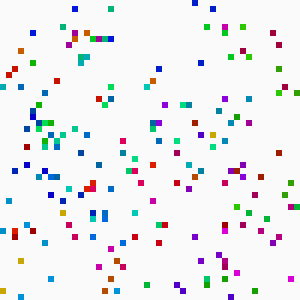

In [212]:
def day8_visualization(s, *, rep=6, fps=20):
  grid = np.array([list(line) for line in s.splitlines()])
  colors = hh.generate_random_colors(128, max_intensity=110)
  colors[ord('.')] = (250,) * 3
  image = np.array([[colors[ord(ch)] for ch in row] for row in grid], np.uint8)
  image = image.repeat(rep, 0).repeat(rep, 1)
  images = []

  for t in itertools.count(2):
    images.append(image.copy())
    for ch in sorted(set(np.unique(grid)) - {'.'}):
      for pair in itertools.permutations(np.argwhere(grid == ch), 2):
        y, x = (1 - t) * pair[0] + t * pair[1]
        if 0 <= y < grid.shape[0] and 0 <= x < grid.shape[1] and grid[y, x] == '.':
          color = colors[ord(ch)]
          image[y * rep + 1 : (y + 1) * rep - 1, x * rep + 1 : (x + 1) * rep - 1] = color
    if np.all(image == images[-1]):
      break

  k0, k1, k2 = int(fps * 1.5), int(fps * 1.5), 2 * fps
  images = [images[0]] * k0 + [images[1]] * k1 + images[2:-1] + [images[-1]] * k2
  media.show_video(images, codec='gif', fps=fps, title='day08')


day8_visualization(puzzle.input)

<a name="day9"></a>
## Day 9: Defragmentation

- Part 1: Move file blocks one at a time from the end of the disk to the leftmost free space block (until there are no gaps remaining between file blocks).  What is the resulting filesystem checksum?

- Part 2: Attempt to move whole files to the leftmost span of free space blocks that could fit the file. Attempt to move each file exactly once in order of decreasing file ID number.  What is the resulting filesystem checksum?

In [54]:
puzzle = advent.puzzle(day=9)

For [day 9](https://adventofcode.com/2024/day/9), `puzzle.input` has a single line of 19_999 characters:

54707966279768842692749123125344784977408572299038672520277015604531688111773598 ... 96383959522830932922724371425461433


The stored answers are: `{1: '6262891638328', 2: '6287317016845'}`

In [55]:
s1 = '2333133121414131402'

In [56]:
def day9a_part1(s):  # Slow with many list slicing operations.
  values = list(map(int, list(s.strip())))
  checksum = position = index = 0
  last_index = len(values) // 2

  while values:
    for _ in range(values[0]):
      checksum += position * index
      position += 1
    values = values[1:]
    index += 1
    if values:
      for _ in range(values[0]):
        while len(values) > 1 and values[-1] == 0:
          values = values[:-2]
          last_index -= 1
        if len(values) > 1:
          checksum += position * last_index
          position += 1
          values[-1] -= 1
      values = values[1:]

  return checksum


check_eq(day9a_part1(s1), 1928)
puzzle.verify(1, day9a_part1)

(Part 1: 0.146 s)


In [57]:
def day9_part1(s):  # Faster using list indexing and length checking.
  values = list(map(int, list(s.strip())))
  last_index = len(values) // 2
  checksum = position = index = i = 0

  while i < len(values):
    for _ in range(values[i]):
      checksum += position * index
      position += 1
    i += 1
    index += 1
    if i < len(values):
      for _ in range(values[i]):
        while i + 1 < len(values):
          if values[-1]:
            checksum += position * last_index
            position += 1
            values[-1] -= 1
            break
          values.pop()
          values.pop()
          last_index -= 1
      i += 1

  return checksum


check_eq(day9_part1(s1), 1928)
puzzle.verify(1, day9_part1)

(Part 1: 0.008 s)


In [58]:
def day9a_part2(s):  # Slow.
  generator = enumerate(more_itertools.grouper(s.strip(), 2, 'fill', 0))
  pairs: list[tuple[list[int], int]] = [([index] * int(a), int(b)) for index, (a, b) in generator]

  i1 = len(pairs) - 1
  while i1:
    lst, skip = pairs[i1]
    n = len(lst)
    for i0 in range(i1):
      if pairs[i0][1] >= n:
        pairs = pairs[:i0] + [(pairs[i0][0], 0), (lst, pairs[i0][1] - n)] + pairs[i0 + 1 :]
        i1 += 1
        pairs[i1] = [], skip + n
        break
    i1 -= 1

  checksum = position = 0
  for lst, skip in pairs:
    for index in lst:
      checksum += position * index
      position += 1
    position += skip

  return checksum


check_eq(day9a_part2(s1), 2858)
# puzzle.verify(2, day9a_part2)  # ~2.6 s.

In [59]:
def day9_part2(s):  # Fast.  (numpy is slower)
  values = list(map(int, s.strip() + '0'))
  nums, skips = values[::2], values[1::2]
  positions = np.cumsum([0, 0] + values, dtype=np.int64)[1::2]
  empty_index = [0] * 10  # First possible empty space of each size.

  checksum = 0
  for i1 in reversed(range(len(nums))):
    n = nums[i1]
    position = positions[i1]
    for i0 in range(empty_index[n], i1):
      if skips[i0] >= n:
        position = positions[i0 + 1] - skips[i0]
        skips[i0] -= n
        break
    empty_index[n] = i0
    for _ in range(n):
      checksum += position * i1
      position += 1

  return checksum


check_eq(day9_part2(s1), 2858)
puzzle.verify(2, day9_part2)

(Part 2: 0.015 s)


day09

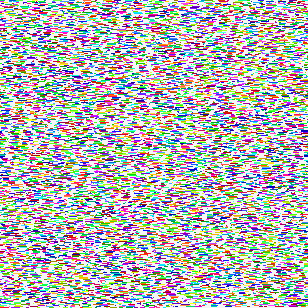

In [60]:
def day9_part2_visualization(s, rep=1):
  values = list(map(int, s.strip() + '0'))
  nums, skips = values[::2], values[1::2]
  positions = np.cumsum([0, 0] + values, dtype=np.int64)[1::2]
  empty_index = [0] * 10  # First possible empty space of each size.
  back_color = (245,) * 3
  image_size = math.ceil(math.sqrt(positions[-1]))
  images = []
  image = np.full((image_size**2, 3), back_color, np.uint8)
  colors = hh.generate_random_colors(200)
  for index, (position, num) in enumerate(zip(positions, nums)):
    image[position : position + num] = colors[index % len(colors)]

  def add_image():
    image2 = image.reshape(image_size, image_size, 3).repeat(rep, 0).repeat(rep, 1)
    images.append(image2)

  add_image()
  for i1 in reversed(range(len(nums))):
    n = nums[i1]
    position = positions[i1]
    for i0 in range(empty_index[n], i1):
      if skips[i0] >= n:
        image[position : position + n] = back_color
        position = positions[i0 + 1] - skips[i0]
        image[position : position + n] = colors[i1 % len(colors)]
        skips[i0] -= n
        if i1 % 20 == 0:
          add_image()
        break
    empty_index[n] = i0

  add_image()
  images = [images[0]] * 90 + images + [images[-1]] * 150
  media.show_video(images, codec='gif', fps=50, title='day09')


day9_part2_visualization(puzzle.input)

<a name="day10"></a>
## Day 10: Trailheads

- Part 1: A hiking trail is a 4-connected path whose height increases by exactly one each move.  A trailhead's score is the number of height-9 positions reachable from that trailhead via a hiking trail.  What is the sum of the scores of all trailheads on your topographic map?

- Part 2: A trailhead's rating is the number of distinct hiking trails which begin at that trailhead.  What is the sum of the ratings of all trailheads?

In [61]:
puzzle = advent.puzzle(day=10)

For [day 10](https://adventofcode.com/2024/day/10), `puzzle.input` has 58 lines:

4310123125454565678965012358943210989010210012304563563434
3211054034565654561676983467659823874323398943215654654323
4302369879654243010385474563458765665489487654398723763210
8498478988732132121292365698369034568676574503123017898432
9567565676543001432101076547278125679676543211094323496501
8543676507867652549212981036107089588789232103785210587611
7652783412998543678903620125612176495610103212636707676210
6701698321037933567216710534523125324321254103529898764389
 ...
1954105409898216712989834367070786765496589874505497874387
0867134106701007603494325454321605834101476723214367801296
1798013265432198556583410765234514923452365214523254900145
5654329870120123467898327892101623014565454301234103213234


The stored answers are: `{1: '822', 2: '1801'}`

In [62]:
s1 = """\
89010123
78121874
87430965
96549874
45678903
32019012
01329801
10456732
"""

In [63]:
def day10a(s, part2=False):  # Using a numpy.array(), set, and Counter.
  grid = np.array([list(line) for line in s.splitlines()], int)
  grid = np.pad(grid, 1, constant_values=-1)
  trailheads = np.argwhere(grid == 0)
  neighbors = (0, -1), (0, 1), (-1, 0), (1, 0)
  total = 0

  for y0, x0 in trailheads:
    if not part2:
      active = {(y0, x0)}  # Set of positions reached after `dist` moves.
      for dist in range(1, 10):
        active2 = set()
        for y, x in active:
          for dy, dx in neighbors:
            y2, x2 = y + dy, x + dx
            if grid[y2, x2] == dist:
              active2.add((y2, x2))
        active = active2
      total += len(active)

    else:
      counter = collections.Counter([(y0, x0)])  # Number of paths reaching position.
      for dist in range(1, 10):
        counter2 = collections.Counter[tuple[int, int]]()
        for (y, x), count in counter.items():
          for dy, dx in neighbors:
            y2, x2 = y + dy, x + dx
            if grid[y2, x2] == dist:
              counter2[y2, x2] += count
        counter = counter2
      total += counter.total()

  return total


check_eq(day10a(s1), 36)
puzzle.verify(1, day10a)

day10a_part2 = functools.partial(day10a, part2=True)
check_eq(day10a_part2(s1), 81)
puzzle.verify(2, day10a_part2)

(Part 1: 0.005 s)
(Part 2: 0.010 s)


In [64]:
def day10b(s, part2=False):  # Faster using tuple[tuple[int, ...]].
  grid = tuple(tuple(int(ch) for ch in line) for line in s.splitlines())
  ysize, xsize = len(grid), len(grid[0])
  neighbors = (0, -1), (0, 1), (-1, 0), (1, 0)
  total = 0

  for y0, row in enumerate(grid):
    for x0, val in enumerate(row):
      if val != 0:
        continue
      if not part2:
        active = {(y0, x0)}  # Set of positions reached after `dist` moves.
        for dist in range(1, 10):
          active2 = set()
          for y, x in active:
            for dy, dx in neighbors:
              y2, x2 = y + dy, x + dx
              if 0 <= y2 < ysize and 0 <= x2 < xsize and grid[y2][x2] == dist:
                active2.add((y2, x2))
          active = active2
        total += len(active)

      else:
        counter = collections.Counter([(y0, x0)])  # Number of paths reaching position.
        for dist in range(1, 10):
          counter2 = collections.Counter[tuple[int, int]]()
          for (y, x), count in counter.items():
            for dy, dx in neighbors:
              y2, x2 = y + dy, x + dx
              if 0 <= y2 < ysize and 0 <= x2 < xsize and grid[y2][x2] == dist:
                counter2[y2, x2] += count
          counter = counter2
        total += counter.total()

  return total


check_eq(day10b(s1), 36)
puzzle.verify(1, day10b)

day10b_part2 = functools.partial(day10b, part2=True)
check_eq(day10b_part2(s1), 81)
puzzle.verify(2, day10b_part2)

(Part 1: 0.003 s)
(Part 2: 0.006 s)


In [65]:
@numba.njit
def day10c_jit(grid, part2):  # Numba implementation of day10a().
  # Curiously, dict is faster than Counter when omitting numba jit.
  trailheads = np.argwhere(grid == 0)
  neighbors = (0, -1), (0, 1), (-1, 0), (1, 0)
  total = 0

  for y0, x0 in trailheads:
    if not part2:
      active = {(y0, x0)}  # Set of positions reached after `dist` moves.
      for dist in range(1, 10):
        active2 = set()
        for y, x in active:
          for dy, dx in neighbors:
            y2, x2 = y + dy, x + dx
            if grid[y2, x2] == dist:
              active2.add((y2, x2))
        active = active2
      total += len(active)

    else:
      counter = {(y0, x0): 1}  # Number of paths reaching position.
      for dist in range(1, 10):
        counter2: dict[tuple[int, int], int] = {}
        for (y, x), count in counter.items():
          for dy, dx in neighbors:
            y2, x2 = y + dy, x + dx
            if grid[y2, x2] == dist:
              if (y2, x2) in counter2:
                counter2[y2, x2] += count
              else:
                counter2[y2, x2] = count
        counter = counter2
      for count in counter.values():
        total += count

  return total


def day10c(s, part2=False):  # Using a numpy.array().
  grid = np.array([list(line) for line in s.splitlines()], int)
  grid = np.pad(grid, 1, constant_values=-1)
  return day10c_jit(grid, part2)


check_eq(day10c(s1), 36)
puzzle.verify(1, day10c)

day10c_part2 = functools.partial(day10c, part2=True)
check_eq(day10c_part2(s1), 81)
puzzle.verify(2, day10c_part2)

(Part 1: 0.001 s)
(Part 2: 0.001 s)


In [66]:
# roflgar https://github.com/rothos/advent-of-code/blob/master/2024/10.py
def day10d(s, part2=False):
  lines = s.splitlines()
  chart = tuple(tuple(int(c) for c in line) for line in lines)
  w, h = len(chart[0]), len(chart)

  if not part2:
    scores1 = [[set[tuple[int, int]]() for _ in line] for line in chart]
    for n in range(9, -1, -1):
      for ci in range(h):
        for cj in range(w):
          if chart[ci][cj] != n:
            continue
          if n == 9:
            scores1[ci][cj].add((ci, cj))
          else:
            for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
              ni, nj = ci + di, cj + dj
              if 0 <= ni < h and 0 <= nj < w and chart[ni][nj] == n + 1:
                scores1[ci][cj] |= scores1[ni][nj]
    return sum(len(scores1[i][j]) for i in range(h) for j in range(w) if chart[i][j] == 0)

  if 1:
    scores2 = [[0 for _ in line] for line in chart]
    for n in range(9, -1, -1):
      for ci in range(h):
        for cj in range(w):
          if chart[ci][cj] != n:
            continue
          if n == 9:
            scores2[ci][cj] = 1
          else:
            for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
              ni, nj = ci + di, cj + dj
              if 0 <= ni < h and 0 <= nj < w and chart[ni][nj] == n + 1:
                scores2[ci][cj] += scores2[ni][nj]
    return sum(scores2[i][j] for i in range(h) for j in range(w) if chart[i][j] == 0)


check_eq(day10d(s1), 36)
puzzle.verify(1, day10d)

day10d_part2 = functools.partial(day10d, part2=True)
check_eq(day10d_part2(s1), 81)
puzzle.verify(2, day10d_part2)

(Part 1: 0.005 s)
(Part 2: 0.005 s)


In [67]:
def day10e_part2(s):  # Using numpy and 2D slicing.
  grid = np.array([list(line) for line in s.splitlines()], int)
  grid = np.pad(grid, 1, constant_values=-1)
  a = np.zeros(grid.shape, int)
  a[grid == 0] = 1

  for i in range(1, 10):
    a[1:-1, 1:-1] = a[:-2, 1:-1] + a[2:, 1:-1] + a[1:-1, :-2] + a[1:-1, 2:]
    a[grid != i] = 0

  return a.sum()


check_eq(day10e_part2(s1), 81)
puzzle.verify(2, day10e_part2)

(Part 2: 0.001 s)


In [68]:
@numba.njit
def day10_jit(grid, part2):  # Fastest numba implementation.
  neighbors = (0, -1), (0, 1), (-1, 0), (1, 0)
  total = 0

  if not part2:
    for y0 in range(1, grid.shape[0] - 1):
      for x0 in range(1, grid.shape[1] - 1):
        if grid[y0, x0] == 0:
          active = {(y0, x0)}  # Set of positions reached after `dist` moves.
          for dist in range(1, 10):
            active2 = set()
            for y, x in active:
              for dy, dx in neighbors:
                y2, x2 = y + dy, x + dx
                if grid[y2, x2] == dist:
                  active2.add((y2, x2))
            active = active2
          total += len(active)

  else:
    a = np.empty_like(grid)
    for y in range(1, grid.shape[0] - 1):
      for x in range(1, grid.shape[1] - 1):
        if grid[y, x] == 9:
          a[y, x] = 1
    for dist in range(8, -1, -1):
      for y in range(1, grid.shape[0] - 1):
        for x in range(1, grid.shape[1] - 1):
          if grid[y, x] == dist:
            count = 0
            for dy, dx in neighbors:
              y2, x2 = y + dy, x + dx
              if grid[y2, x2] == dist + 1:
                count += a[y2, x2]
            a[y, x] = count
    for y in range(1, grid.shape[0] - 1):
      for x in range(1, grid.shape[1] - 1):
        if grid[y, x] == 0:
          total += a[y, x]

  return total


def day10(s, part2=False):
  grid = np.array([list(line) for line in s.splitlines()], int)
  grid = np.pad(grid, 1, constant_values=-1)
  return day10_jit(grid, part2)


check_eq(day10(s1), 36)
puzzle.verify(1, day10)

day10_part2 = functools.partial(day10, part2=True)
check_eq(day10_part2(s1), 81)
puzzle.verify(2, day10_part2)

(Part 1: 0.001 s)
(Part 2: 0.000 s)


<a name="day11"></a>
## Day 11: Replacing list elements

- Part 1: Given some evolutionary rules for a variable-length sequence of stones, how many stones will you have after 25 steps?

- Part 2: How many stones will you have after 75 steps?

In [69]:
puzzle = advent.puzzle(day=11)

For [day 11](https://adventofcode.com/2024/day/11), `puzzle.input` has a single line of 36 characters:

0 5601550 3914 852 50706 68 6 645371


The stored answers are: `{1: '189092', 2: '224869647102559'}`

In [70]:
s1 = '125 17'

In [71]:
def day11a_part1(s, *, steps=25):  # Using generators.  Too slow for Part 2.

  def replace(e: str) -> Iterator[str]:
    if e == '0':
      yield '1'
    elif len(e) % 2 == 0:
      yield e[: len(e) // 2]
      yield e[len(e) // 2 :].lstrip('0') or '0'
    else:
      yield str(int(e) * 2024)

  a = s.split()
  for _ in range(steps):
    a = itertools.chain.from_iterable(replace(e) for e in a)

  return sum(1 for _ in a)


check_eq(day11a_part1(s1, steps=1), 3)
check_eq(day11a_part1(s1, steps=6), 22)
check_eq(day11a_part1(s1, steps=25), 55312)
puzzle.verify(1, day11a_part1)

(Part 1: 0.093 s)


In [72]:
def day11b(s, *, part2=False):  # Adapted from @roflgar.  Integer elements.

  @functools.cache
  def length(value: int, steps: int) -> int:
    assert value <= 2**53  # We get within 0.3%, but no higher even for larger `steps`.
    if steps == 0:
      return 1
    if value == 0:
      return length(1, steps - 1)
    if (log_floor := math.floor(math.log(value, 10))) % 2:
      d = 10 ** ((log_floor + 1) // 2)
      div, mod = divmod(value, d)
      return length(div, steps - 1) + length(mod, steps - 1)
    return length(value * 2024, steps - 1)

  return sum(length(int(e), (25, 75)[part2]) for e in s.split())


puzzle.verify(1, day11b)

day11b_part2 = functools.partial(day11b, part2=True)
puzzle.verify(2, day11b_part2)

(Part 1: 0.002 s)
(Part 2: 0.076 s)


In [73]:
def day11(s, *, part2=False):  # Fast using memoization.  String elements.

  @functools.cache
  def length(e: str, steps: int) -> int:
    if steps == 0:
      return 1
    if e == '0':
      return length('1', steps - 1)
    if len(e) % 2 == 0:
      e1, e2 = e[: len(e) // 2], (e[len(e) // 2 :].lstrip('0') or '0')
      return length(e1, steps - 1) + length(e2, steps - 1)
    return length(str(int(e) * 2024), steps - 1)

  return sum(length(e, (25, 75)[part2]) for e in s.split())


puzzle.verify(1, day11)

day11_part2 = functools.partial(day11, part2=True)
puzzle.verify(2, day11_part2)

(Part 1: 0.002 s)
(Part 2: 0.064 s)


<a name="day12"></a>
## Day 12: Region perimeters/sides

- Part 1: The price of fence required for a region is found by multiplying that region's area by its perimeter.  What is the total price of fencing all regions on your map?

- Part 2: Instead of using the perimeter to calculate the price, you need to use the number of sides each region has.  What is the new total price of fencing all regions on your map?

---

A key insight to simplify the Part 2 solution is to note that the number of sides for a region is equivalent to the number of corners along its perimeter.

In [201]:
puzzle = advent.puzzle(day=12)

For [day 12](https://adventofcode.com/2024/day/12), `puzzle.input` has 140 lines:

SSFFFFFFFFFFFFFFFFEEEZZZZRZZZZZZZZZZZKKKKKKKKKKKKKKKSSSSSSSSSSSSSKKKKKKKKKQDDDDD ... WWWWWWWWYYWKKKKKKKKKKKKKKKKKKKKKKKK
FFFFFFFFFFFFFFFFFFFEEEZZZZZZZZZZZZZZZZKKKKKKKKKKKKKKSSSSSSSSSSSSSKKKKKXXXXXXXXXD ... WWWWWWWWWWWKKKKKKKKKKKKKKKKSKKKKKKK
FFFFFFFFFFFFFFFFFFFFEEZZZZZZZZZZZZZZZKKKKKKKKKKKKKKKSSSSSSSSSSSSSKKKKKXXXXXXXXXD ... WWWWWWWWWWWKKKKKKKKQKKKSSSSSSKKKKKK
FFFFFFFFFFFFFFFFFIIIIEEZZZZZZZZZZZZZZKKKKKKKKKKKKKSSSSSSSSSSSSSKKKKKKKXXXXXXXXXD ... WWWWWWWWWWWKKKKKKKKQQQQSSSSSSSSKKKK
VVVFFFFFFFFFFFIIIIIIIEEZZZZZZZZZZZZZZKKKKKKKKKKKKKSSSSSHHHSHHSSKKKKKKDXXXXXXXXXD ... MMWWWWWWWWWKKKKKMMKKQQQSSSSSSSSKSSK
VVVFFFFFFFFFFFFIIIIIIEZZZZZZZZZZZZZZZKKKKKKKKKKKKKKSSSSHHHHHSSSSKKKKKIXXXXXXXXXD ... MMMWWWWWWKKKKMMMMMMQQQQSSSSSSSSKSSK
VVVVFAFFFFFFFFFIIIIIIIIZZZZZZZZZZZZZZKKKKKKKKKKKKKKKSSSSHHHSSSSSKKKKKIXXXXXXXXXD ... MMWWWWWWWWWKWWMMMMQQQQQSSSSSSSSSSSK
VVVVFFFFFFFFFFFIIIIIIIIIIZZZZZZZZZZZKKKKKKKKKKKKKSKSSSSVSHHSSSSSSSSSKDXXXXXXXXXX ... MMWWWWWWWWWWWWQQMQQQQQQQSSSSSSXSASK
 ...
APAAAAAPPPPPPPHHHHHAAAAAFFF

The stored answers are: `{1: '1533024', 2: '910066'}`

In [202]:
s1 = """\
AAAA
BBCD
BBCC
EEEC
"""

In [203]:
def day12a(s, *, part2=False):  # Using scipy.ndimage.label() for connected components.
  grid = np.array([list(line) for line in s.splitlines()])
  chars = np.unique(grid)
  structure = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
  neighbors = (-1, 0), (0, -1), (1, 0), (0, 1)
  regions = []
  # It is unfortunate that scipy.ndimage.label() cannot directly segment a non-binary image.
  # Note that OpenCV has the same limitation:
  #   retval, labels = cv.connectedComponents(mask, labeled_image, connectivity=4)
  for char in chars:
    mask = (grid == char).astype(int)
    labeled_mask, num_features = scipy.ndimage.label(mask, structure=structure)
    for region_id in range(num_features):
      region_coords = set(map(tuple, np.argwhere(labeled_mask == region_id + 1)))
      regions.append(region_coords)

  def area(region: set[tuple[int, int]]) -> int:
    return len(region)

  def perimeter(region: set[tuple[int, int]]) -> int:
    return sum((y + dy, x + dx) not in region for y, x in region for dy, dx in neighbors)

  def sides(region: set[tuple[int, int]]) -> int:
    count = 0
    for y, x in region:
      sames = []
      for dy, dx in neighbors:
        same = (y + dy, x + dx) in region
        sames.append((dy, dx, same))
      wrapped = itertools.chain.from_iterable((sames, [sames[0]]))
      for (dy1, dx1, same1), (dy2, dx2, same2) in itertools.pairwise(wrapped):
        count += (not same1 and not same2) or (
            same1 and same2 and (y + dy1 + dy2, x + dx1 + dx2) not in region
        )
    return count

  return sum(area(region) * (sides(region) if part2 else perimeter(region)) for region in regions)


check_eq(day12a(s1), 140)
puzzle.verify(1, day12a)

day12a_part2 = functools.partial(day12a, part2=True)
check_eq(day12a_part2(s1), 80)
puzzle.verify(2, day12a_part2)

(Part 1: 0.051 s)
(Part 2: 0.071 s)


In [204]:
# Using skimage.segmentation.flood_fill().  It is slow.  The bottleneck is flood_fill().
def day12b(s, *, part2=False):
  grid = np.pad(np.array([list(line) for line in s.splitlines()]).view(np.uint32), 1)
  central = grid[1:-1, 1:-1]
  base_index = 100
  index = base_index
  for (y, x), ch_int in np.ndenumerate(central):
    if ch_int < base_index:
      # Slow bottleneck.
      skimage.segmentation.flood_fill(grid, (y + 1, x + 1), index, connectivity=1, in_place=True)
      index += 1

  # areas = np.unique_counts(central).counts
  areas = np.unique(central, return_counts=True)[1]

  if not part2:
    sl0, sl1, sl2 = slice(0, -2), slice(1, -1), slice(2, None)
    slices = ((sl1, sl2), (sl1, sl0), (sl2, sl1), (sl0, sl1))
    perimeters_dir = [
        # np.unique_counts(np.where(central == grid[slice_], 0, central)).counts[1:]
        np.unique(np.where(central == grid[slice_], 0, central), return_counts=True)[1][1:]
        for slice_ in slices
    ]
    perimeters = np.sum(perimeters_dir, axis=0)
    return np.sum(perimeters * areas)


check_eq(day12b(s1), 140)
puzzle.verify(1, day12b)

(Part 1: 0.077 s)


In [205]:
def day12c(s, *, part2=False):  # Concise.
  grid = np.pad([list(line) for line in s.splitlines()], 1)
  visited = grid == '0'
  total = 0

  for yx, ch in np.ndenumerate(grid):
    if visited[yx]:
      continue
    visited[yx] = True
    area = perimeter = sides = 0
    stack = [yx]

    while stack:
      y, x = stack.pop()
      area += 1
      sames = []
      for dy, dx in ((-1, 0), (0, -1), (1, 0), (0, 1)):
        nyx = y + dy, x + dx
        same = grid[nyx] == ch
        sames.append((dy, dx, same))
        if not same:
          perimeter += 1
        elif not visited[nyx]:
          visited[nyx] = True
          stack.append(nyx)
      if part2:
        wrapped = itertools.chain.from_iterable((sames, [sames[0]]))
        for (dy1, dx1, same1), (dy2, dx2, same2) in itertools.pairwise(wrapped):
          sides += (not same1 and not same2) or (
              same1 and same2 and grid[y + dy1 + dy2, x + dx1 + dx2] != ch
          )

    total += area * (sides if part2 else perimeter)

  return total


check_eq(day12c(s1), 140)
puzzle.verify(1, day12c)

day12c_part2 = functools.partial(day12c, part2=True)
check_eq(day12c_part2(s1), 80)
puzzle.verify(2, day12c_part2)

(Part 1: 0.031 s)
(Part 2: 0.053 s)


In [206]:
# Visualization, and fastest.
def day12(s, *, part2=False, visualize=False, rep=4, blinks=6):
  grid = np.pad([list(line) for line in s.splitlines()], 1)
  neighbors = (-1, 0), (0, -1), (1, 0), (0, 1)

  def get_region(yx: tuple[int, int]) -> set[tuple[int, int]]:
    ch = grid[yx]
    region = set()
    stack = [yx]
    while stack:
      y, x = stack.pop()
      region.add((y, x))
      for dy, dx in neighbors:
        nyx = y + dy, x + dx
        if grid[nyx] == ch and nyx not in region:
          region.add(nyx)
          stack.append(nyx)
    return region

  def get_regions() -> list[set[tuple[int, int]]]:
    visited = grid == '0'
    regions = []
    for y, x in np.ndindex(grid.shape):
      if not visited[y, x]:
        region = get_region((y, x))
        regions.append(region)
        for y, x in region:
          visited[y, x] = True
    return regions

  def area(region: set[tuple[int, int]]) -> int:
    return len(region)

  def perimeter(region: set[tuple[int, int]]) -> int:
    return sum((y + dy, x + dx) not in region for y, x in region for dy, dx in neighbors)

  def sides(region: set[tuple[int, int]]) -> int:
    count = 0
    for y, x in region:
      dy1, dx1 = neighbors[-1]
      same1 = (y + dy1, x + dx1) in region
      for dy2, dx2 in neighbors:
        same2 = (y + dy2, x + dx2) in region
        count += (not same1 and not same2) or (
            same1 and same2 and (y + dy1 + dy2, x + dx1 + dx2) not in region
        )
        dy1, dx1, same1 = dy2, dx2, same2
    return count

  def enhance(image):
    return image[1:-1, 1:-1].repeat(rep, 0).repeat(rep, 1)

  regions = get_regions()

  if visualize:
    image = np.zeros((*grid.shape, 3), np.uint8)
    colors = hh.generate_random_colors(200)
    for index, region in enumerate(regions):
      for yx in region:
        image[yx] = colors[index % len(colors)]

    images = [enhance(image)] * 30
    for name, func in {'area': area, 'perimeter': perimeter, 'sides': sides}.items():
      max_region = max(regions, key=func)
      hh.display_html(f'The most {name} in any region is {func(max_region)}.')
      # hh.show(area(max_region), perimeter(max_region), sides(max_region))
      image1 = image.copy()
      for yx in max_region:
        image1[yx] = 255, 220, 220
      images += [enhance(image)] * 15
      images += ([enhance(image1)] * 3 + [enhance(image)] * 1) * blinks

    hh.display_html('We iteratively blink the region with the most area, perimeter, and num sides.')
    hh.display_html('In my puzzle input, the same region maximizes all three properties.')
    media.show_video(images, codec='gif', fps=20, title='day12')

  return sum(area(region) * (sides(region) if part2 else perimeter(region)) for region in regions)


puzzle.verify(1, day12)
day12_part2 = functools.partial(day12, part2=True)
puzzle.verify(2, day12_part2)

(Part 1: 0.036 s)
(Part 2: 0.044 s)


day12

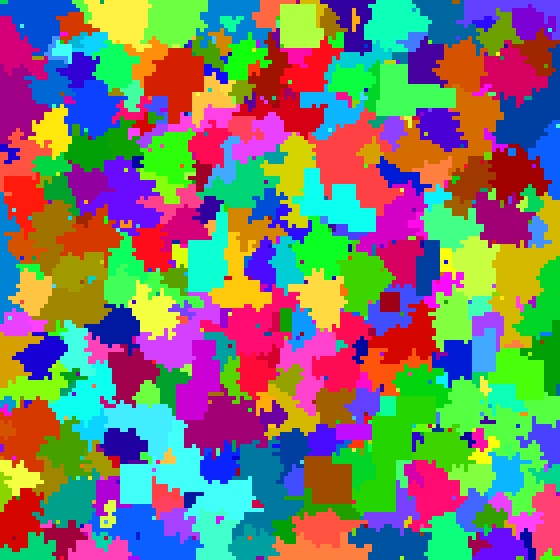

In [207]:
_ = day12(puzzle.input, visualize=True)

<a name="day13"></a>
## Day 13: Skewed claw machines

- Part 1: It costs 3 tokens to push the A button and 1 token to push the B button.  What is the fewest tokens you would have to spend to win all possible prizes?

- Part 2: The position of every prize is actually 10000000000000 higher on both the X and Y axis.  What is the fewest tokens you would have to spend to win all possible prizes?

In [81]:
puzzle = advent.puzzle(day=13)

For [day 13](https://adventofcode.com/2024/day/13), `puzzle.input` has 1_279 lines:

Button A: X+24, Y+90
Button B: X+85, Y+62
Prize: X=6844, Y=6152

Button A: X+35, Y+12
Button B: X+17, Y+52
Prize: X=9516, Y=13408

 ...

Button A: X+29, Y+85
Button B: X+52, Y+16
Prize: X=4745, Y=6405


The stored answers are: `{1: '31065', 2: '93866170395343'}`

In [82]:
s1 = """\
Button A: X+94, Y+34
Button B: X+22, Y+67
Prize: X=8400, Y=5400

Button A: X+26, Y+66
Button B: X+67, Y+21
Prize: X=12748, Y=12176

Button A: X+17, Y+86
Button B: X+84, Y+37
Prize: X=7870, Y=6450

Button A: X+69, Y+23
Button B: X+27, Y+71
Prize: X=18641, Y=10279
"""

In [83]:
def day13a(s, *, part2=False):  # Using sympy.
  total = 0
  for s2 in s.split('\n\n'):
    values = np.array([re.findall(r'\d+', line) for line in s2.splitlines()], np.int64)
    if part2:
      values[2] += 10**13
    x = sympy.Matrix(values[:2].T).LUsolve(sympy.Matrix(values[2]))
    if all(elem.is_Integer for elem in x):
      total += x[0] * 3 + x[1]

  return total


check_eq(day13a(s1), 480)
puzzle.verify(1, day13a)

day13a_part2 = functools.partial(day13a, part2=True)
puzzle.verify(2, day13a_part2)

(Part 1: 0.153 s)
(Part 2: 0.149 s)


In [84]:
def day13b(s, *, part2=False):  # Using numpy.
  total = 0
  for s2 in s.split('\n\n'):
    values = np.array([re.findall(r'\d+', line) for line in s2.splitlines()], np.int64)
    b = values[2] + (10**13 if part2 else 0)
    matrix = values[:2].T
    x = np.linalg.solve(matrix, b)
    rounded = (x + 0.5).astype(np.int64)
    if all(matrix @ rounded == b):
      total += rounded[0] * 3 + rounded[1]

  return total


check_eq(day13b(s1), 480)
puzzle.verify(1, day13b)

day13b_part2 = functools.partial(day13b, part2=True)
puzzle.verify(2, day13b_part2)

(Part 1: 0.005 s)
(Part 2: 0.004 s)


In [85]:
def day13(s, *, part2=False):  # Using numpy, fully vectorized.
  values = np.array(
      [[re.findall(r'\d+', line) for line in s2.splitlines()] for s2 in s.split('\n\n')], np.int64
  )
  b = values[:, 2][..., None] + (10**13 if part2 else 0)
  matrix = np.moveaxis(values[:, :2], 1, 2)
  x = np.linalg.solve(matrix, b)
  rounded = (x + 0.5).astype(np.int64)
  solved = (matrix @ rounded == b).all(1)[:, 0]
  return np.sum(rounded[solved][..., 0] @ [3, 1])


check_eq(day13(s1), 480)
puzzle.verify(1, day13)

day13_part2 = functools.partial(day13, part2=True)
puzzle.verify(2, day13_part2)

(Part 1: 0.002 s)
(Part 2: 0.002 s)


<a name="day14"></a>
## Day 14: Converging pixels

- Part 1: Predict the motion of the robots in your list within a space which is 101 tiles wide and 103 tiles tall. What will the safety factor be after exactly 100 seconds have elapsed?

- Part 2: What is the fewest number of seconds that must elapse for the robots to display the Easter egg?

In [86]:
puzzle = advent.puzzle(day=14)

For [day 14](https://adventofcode.com/2024/day/14), `puzzle.input` has 500 lines:

p=80,58 v=-80,-45
p=80,4 v=-4,-91
p=40,2 v=29,39
p=38,45 v=3,-25
p=95,68 v=82,33
p=75,37 v=44,-31
p=53,27 v=-20,-99
p=47,11 v=-75,93
 ...
p=47,61 v=-93,-19
p=0,82 v=-42,-45
p=83,43 v=-90,28
p=40,26 v=89,-93


The stored answers are: `{1: '219512160', 2: '6398'}`

In [87]:
s1 = """\
p=0,4 v=3,-3
p=6,3 v=-1,-3
p=10,3 v=-1,2
p=2,0 v=2,-1
p=0,0 v=1,3
p=3,0 v=-2,-2
p=7,6 v=-1,-3
p=3,0 v=-1,-2
p=9,3 v=2,3
p=7,3 v=-1,2
p=2,4 v=2,-3
p=9,5 v=-3,-3
"""

In [88]:
def day14a(s, *, part2=False, shape=(103, 101), steps=100, visualize=False, rep=2, fps=50):
  values = np.array([re.findall(r'-?\d+', line) for line in s.splitlines()], np.int64)
  yxs0, dyxs = values[:, 1::-1], values[:, 3:1:-1]

  if not part2:
    yxs = (yxs0 + steps * dyxs) % shape
    count = np.zeros(shape, np.int64)
    np.add.at(count, tuple(yxs.T), 1)
    ym, xm = shape[0] // 2, shape[1] // 2
    quadrants = [[g[:, :xm], g[:, xm + 1 :]] for g in [count[:ym], count[ym + 1 :]]]
    return math.prod(q.sum() for row in quadrants for q in row)

  def variance(t: int, axis: int) -> float:
    return np.var((yxs0[:, axis] + t * dyxs[:, axis]) % shape[axis])

  # We expect the pixel positions in the "tree" image to have lowest variance in both Y and X.
  moduli = shape
  remainders = [min(range(moduli[axis]), key=lambda t: variance(t, axis)) for axis in range(2)]
  t = hh.solve_modulo_congruences(remainders, moduli)

  if visualize:
    images = []
    for step in range(t + 1):
      if step > 100 and step % moduli[0] != remainders[0] and step % moduli[1] != remainders[1]:
        continue
      yxs = (yxs0 + step * dyxs) % shape
      mask = np.full(shape, False)
      mask[tuple(yxs.T)] = True
      image = hh.to_image(mask, 250, 0).repeat(rep, 0).repeat(rep, 1)
      text = f'Step{step:5}'
      hh.overlay_text(image, (10, 120), text, fontsize=14, background=250, align='tl', margin=3)
      images.append(image)
    images = [images[0]] * int(fps * 1.5) + images + [images[-1]] * int(fps * 3)
    media.show_video(images, codec='gif', fps=fps, title='day14a')

  return t


check_eq(day14a(s1, shape=(7, 11)), 12)
puzzle.verify(1, day14a)

day14a_part2 = functools.partial(day14a, part2=True)
puzzle.verify(2, day14a_part2)

(Part 1: 0.001 s)
(Part 2: 0.005 s)


In [222]:
if SHOW_BIG_MEDIA:
  _ = day14a_part2(puzzle.input, visualize=True)  # ~1 s.
  # For my example, remainders = [12, 35], so t = 6398.

Cached result:<br/>
<img src="results/day14a.gif"/>

In [90]:
def day14(
    s, *, part2=False, shape=(103, 101), steps=100, visualize=False, rep=2, supersample=4, fps=50
):
  values = np.array([re.findall(r'-?\d+', line) for line in s.splitlines()], int)
  yxs0, dyxs = values[:, 1::-1], values[:, 3:1:-1]

  if not part2:
    yxs = (yxs0 + steps * dyxs) % shape
    count = np.zeros(shape, int)
    np.add.at(count, tuple(yxs.T), 1)
    ym, xm = shape[0] // 2, shape[1] // 2
    quadrants = [[g[:, :xm], g[:, xm + 1 :]] for g in [count[:ym], count[ym + 1 :]]]
    return math.prod(q.sum() for row in quadrants for q in row)

  def variance(t: int, axis: int) -> float:
    return np.var((yxs0[:, axis] + t * dyxs[:, axis]) % shape[axis])

  # We expect the pixel positions in the "tree" image to have lowest variance in both Y and X.
  moduli = shape
  remainders = [min(range(moduli[axis]), key=lambda t: variance(t, axis)) for axis in range(2)]
  t_solution = hh.solve_modulo_congruences(remainders, moduli)

  if visualize:
    images = []
    iter_next = iter([min(remainders), max(remainders), t_solution])
    next_t = next(iter_next)
    t, dt = 0.0, 0.001
    speedup, slowdown = 1.1, 0.9
    while True:
      yxs = (yxs0 + t * dyxs) % shape
      rep2 = rep * (supersample if dt < 0.05 else 1)
      mask = np.full(shape, False).repeat(rep2, 0).repeat(rep2, 1)
      for y, x in (yxs * rep2 + 0.5).astype(np.int64):
        mask[y : y + rep2, x : x + rep2] = True
      image = hh.to_image(mask, 250, 0)
      image = resampler.resize(image, np.array(image.shape[:2]) // (rep2 // rep), filter='box')
      yx_text = 0, len(image[0])
      text = f'Time{t:9.3f}'
      hh.overlay_text(image, yx_text, text, fontsize=14, background=250, align='tr', margin=4)
      images.append(image)
      if t == next_t:
        images.extend([image] * (fps // 3))
        dt = 0.001
        if (next_t := next(iter_next, -1)) < 0:
          break
      t = min(t + dt, next_t)
      if next_t - t - dt < dt * speedup / (1 - slowdown):  # (Sum of geometric sequence.)
        dt = max(dt * slowdown, 0.001)
      else:
        dt *= speedup
    images = [images[0]] * int(fps * 1) + images + [images[-1]] * int(fps * 2)
    media.show_video(images, codec='gif', fps=fps, title='day14b')

  return t_solution


check_eq(day14(s1, shape=(7, 11)), 12)
puzzle.verify(1, day14)

day14_part2 = functools.partial(day14, part2=True)
puzzle.verify(2, day14_part2)

(Part 1: 0.001 s)
(Part 2: 0.005 s)


In [91]:
if SHOW_BIG_MEDIA:
  _ = day14_part2(puzzle.input, visualize=True)  # ~4 s.

Cached result:<br/>
<img src="results/day14b.gif"/>

<a name="day15"></a>
## Day 15: Pushing 2D blocks

- Part 1: After the robot is finished moving, what is the sum of all boxes' GPS coordinates?

- Part 2: Everything except the robot is twice as wide!  What is the sum of all boxes' final GPS coordinates?

In [92]:
puzzle = advent.puzzle(day=15)

For [day 15](https://adventofcode.com/2024/day/15), `puzzle.input` has 71 lines:

##################################################
#.#...........O.O....#..O.#O.O#.O....OOO.O...O...#
#.#O......O...O..#...........#...#.....#...##....#
#O.OO..O.OO.O..OO.....O...#...O...#O.O.#..O...##.#
#...OOO..#..OO.....O.O.#OO#.OO#....O.......#..OO##
#.O......OO.O.O...OOO.O#......##..O.O..O......O###
##.......#.O.OO..O.....O....#..........O..O.O...O#
#.....OO..##.O.#...#....#......OO.....O.O...O....#
 ...
<v<><vv<>v<vv>><<^^^<>>^^<>v^^vv^vv<v<vvv<<v<<>^>v<vv^>^<vv>>^>>v>><>>>^^v^^v<v> ... <v<vvvv<>vv>><v^v^<v<^^^<vv<>><<><<
^<^<>><>>^^>v^>><>v<^<>^<<><^><>v^<v>>v<<><><>v<v>^v><^^>^^<v^><^<><>v>v>v<>>^<^ ... ^^^><>^<vv>^<v<^vv^<<><v^>>^v^<vv<>
>>^>>><v>v<v><>v^><v><<vvv<^vvv><v<v^^v>^^vv>v^>v>^v<>>v<v>>^v<^<<<^<<>vvv^v>^^< ... v^<>>vv^^>^^<>>>^<>>>>^^^<^<<<v<<v^
v><<v><v<v<><^<><^>vv>>v>v>>>^>^v>v<v>^>^^<<v>^^v>^^><^v^<v<><v><v^>^^<v<^>^<^<v ... ^v<v^^v>v^vv<v><>^v^v>^<>^><>v>^^<<


The stored answers are: `{1: '1509074', 2: '1521453'}`

In [93]:
s1 = """\
##########
#..O..O.O#
#......O.#
#.OO..O.O#
#..O@..O.#
#O#..O...#
#O..O..O.#
#.OO.O.OO#
#....O...#
##########

<vv>^<v^>v>^vv^v>v<>v^v<v<^vv<<<^><<><>>v<vvv<>^v^>^<<<><<v<<<v^vv^v>^
vvv<<^>^v^^><<>>><>^<<><^vv^^<>vvv<>><^^v>^>vv<>v<<<<v<^v>^<^^>>>^<v<v
><>vv>v^v^<>><>>>><^^>vv>v<^^^>>v^v^<^^>v^^>v^<^v>v<>>v^v^<v>v^^<^^vv<
<<v<^>>^^^^>>>v^<>vvv^><v<<<>^^^vv^<vvv>^>v<^^^^v<>^>vvvv><>>v^<<^^^^^
^><^><>>><>^^<<^^v>>><^<v>^<vv>>v>>>^v><>^v><<<<v>>v<v<v>vvv>^<><<>^><
^>><>^v<><^vvv<^^<><v<<<<<><^v<<<><<<^^<v<^^^><^>>^<v^><<<^>>^v<v^v<v^
>^>>^v>vv>^<<^v<>><<><<v<<v><>v<^vv<<<>^^v^>^^>>><<^v>>v^v><^^>>^<>vv^
<><^^>^^^<><vvvvv^v<v<<>^v<v>v<<^><<><<><<<^^<<<^<<>><<><^^^>^^<>^>v<>
^^>vv<^v^v<vv>^<><v<^v>^^^>>>^^vvv^>vvv<>>>^<^>>>>>^<<^v>^vvv<>^<><<v>
v^^>>><<^^<>>^v^<v^vv<>v^<<>^<^v^v><^<<<><<^<v><v<>vv>>v><v^<vv<>v^<<^
"""

In [94]:
s2 = """\
#######
#...#.#
#.....#
#..OO@#
#..O..#
#.....#
#######

<vv<<^^<<^^
"""

In [95]:
def day15(s, *, part2=False, visualize=False, rep=7):
  p1, p2 = s.split('\n\n')
  if part2:
    p1 = p1.replace('#', '##').replace('O', '[]').replace('.', '..').replace('@', '@.')
  grid = np.array([list(line) for line in p1.splitlines()])
  moves = ''.join(line.strip() for line in p2.splitlines())
  ((y, x),) = np.argwhere(grid == '@')
  grid[y, x] = '.'
  images = []

  def add_image(r=rep):
    if visualize:
      image = hh.to_image(grid == '#', 250, 30).repeat(r, 0).repeat(r, 1)
      image[y * r : (y + 1) * r, x * r : (x + 1) * r] = 255, 0, 0
      for v, u in np.argwhere(grid == 'O['[part2]):
        image[v * r + 1 : (v + 1) * r - 1, u * r + 1 : (u + 1 + part2) * r - 1] = 140, 140, 255
      images.append(image)

  add_image()
  t, interval = 0.0, 0.2
  for ch in moves:
    dy, dx = {'<': (0, -1), '>': (0, 1), '^': (-1, 0), 'v': (1, 0)}[ch]
    if dy == 0 or not part2:
      for step in itertools.count(1):
        ch = grid[y + dy * step, x + dx * step]
        if ch in '#.':
          break
      if ch != '#':
        if step > 1:
          grid[y + dy, x + dx] = '.'
          if part2:
            for i in range(2, step + 1):
              grid[y + dy * i, x + dx * i] = '[]'[(i % 2) ^ (dx < 0)]
          else:
            grid[y + dy * step, x + dx * step] = 'O'
        y, x = y + dy, x + dx

    else:

      def can_move(y, x):
        return (
            grid[y + dy][x] == '.'
            or (grid[y + dy][x] == '[' and can_move(y + dy, x) and can_move(y + dy, x + 1))
            or (grid[y + dy][x] == ']' and can_move(y + dy, x - 1) and can_move(y + dy, x))
        )

      def do_move(y, x):
        if grid[y + dy, x] == '[':
          do_move(y + dy, x)
          do_move(y + dy, x + 1)
        elif grid[y + dy, x] == ']':
          do_move(y + dy, x - 1)
          do_move(y + dy, x)
        grid[y + dy, x] = grid[y, x]
        grid[y, x] = '.'

      if can_move(y, x):
        do_move(y, x)
        y, x = y + dy, x + dx

    if t >= interval:
      add_image()
      t = 0.0
    t += 1.0
    interval += 0.005

  if visualize:
    add_image()
    images = [images[0]] * 100 + images + [images[-1]] * 150
    title = 'day15b' if part2 else 'day15a'
    media.show_video(images, codec='gif', fps=50, title=title)

  return sum(y * 100 + x for y, x in np.argwhere(grid == ('[' if part2 else 'O')))


check_eq(day15(s1), 10092)
puzzle.verify(1, day15)

day15_part2 = functools.partial(day15, part2=True)
check_eq(day15_part2(s1), 9021)
puzzle.verify(2, day15_part2)

(Part 1: 0.017 s)
(Part 2: 0.042 s)


day15a

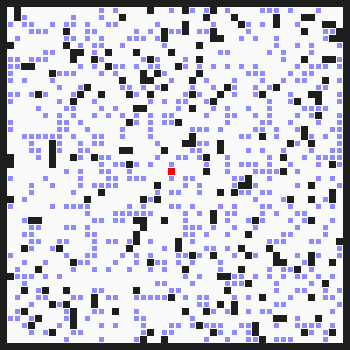

day15b

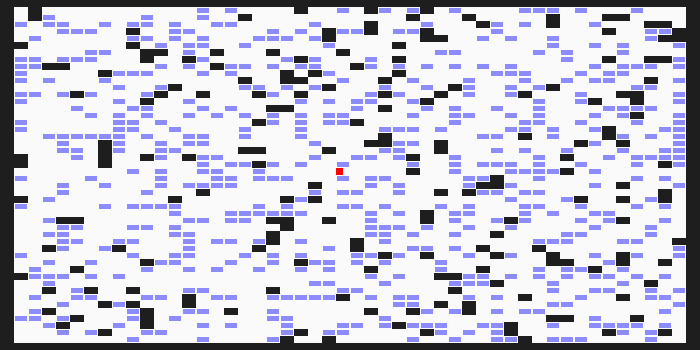

In [96]:
_ = day15(puzzle.input, visualize=True)  # ~5 s.
_ = day15_part2(puzzle.input, visualize=True)  # ~8 s.  (Bottleneck is ffmpeg pipe.)

<a name="day16"></a>
## Day 16: Maze with turn costs

- Part 1: The cost of a path is 1 to move and 1000 to turn by 90 degrees.  What is the lowest score path from 'S' to 'E' in the maze?

- Part 2: How many tiles are part of at least one of the best paths through the maze?

In [97]:
puzzle = advent.puzzle(day=16)

For [day 16](https://adventofcode.com/2024/day/16), `puzzle.input` has 141 lines:

################################################################################ ... ###################################
#.#.....#...#...........#...........#.....#.......#.......#.....#............... ... #.......#........................E#
#.#.###.#.#.#.###.###.#.###.#.###.###.#.#.#.#.###.#####.#.#.###.###.###.#####.## ... ###.###.#.###.#.#.###.#######.###.#
#.....................#.....#.#...#...#.#.#.#...#...#...#.#...#...#.#.......#... ... ..#...#.#...#.#.#.#...#.....#.....#
#.#.#.#########.#.#.###########.#.#.###.#.#.###.###.#.###.###.###.#.###.#.#.#### ... #.###.#.###.#.#.#.#.#.#.#.#.#.#####
#.#.#.......#...#...#...................#.#...#...#...#.#.....#.#.#...#.#.#..... ... #.....#.#...#...#...#...#.#.#...#.#
#.#.#.#####.#.###.#.#.#.#.#.#.###.#####.###.#####.#####.#######.#.###.#.#.#####. ... #######.#.###########.###.#####.#.#
#.#.#...#...#.#...#.#.#...#.#...#.#.....#.........................#...#.#...#.#. ... ......#.#.#...#.......#...#.....#.#
 ...
#.........#.#.....#...#....

The stored answers are: `{1: '82460', 2: '590'}`

In [98]:
s1 = """\
###############
#.......#....E#
#.#.###.#.###.#
#.....#.#...#.#
#.###.#####.#.#
#.#.#.......#.#
#.#.#####.###.#
#...........#.#
###.#.#####.#.#
#...#.....#.#.#
#.#.#.###.#.#.#
#.....#...#.#.#
#.###.#.#.#.#.#
#S..#.....#...#
###############
"""

In [99]:
s2 = """\
#################
#...#...#...#..E#
#.#.#.#.#.#.#.#.#
#.#.#.#...#...#.#
#.#.#.#.###.#.#.#
#...#.#.#.....#.#
#.#.#.#.#.#####.#
#.#...#.#.#.....#
#.#.#####.#.###.#
#.#.#.......#...#
#.#.###.#####.###
#.#.#...#.....#.#
#.#.#.#####.###.#
#.#.#.........#.#
#.#.#.#########.#
#S#.............#
#################
"""

In [100]:
def day16a(s, *, part2=False):  # With backtrack recursion.
  grid = np.array([list(line) for line in s.splitlines()])
  ((ys, xs),) = np.argwhere(grid == 'S')
  ((ye, xe),) = np.argwhere(grid == 'E')
  state = ys, xs, 0, 1  # y, x, dy, dx.
  distance = collections.defaultdict(lambda: 10**9)  # For Dijkstra.
  distance[state] = 0
  pq = [(0, state)]

  def neighbors(d, state, sign=1):
    y, x, dy, dx = state
    yield d + sign, (y + dy * sign, x + dx * sign, dy, dx)
    yield d + 1000 * sign, (y, x, -dx, dy)
    yield d + 1000 * sign, (y, x, dx, -dy)

  while pq:
    d, state = heapq.heappop(pq)

    if state[:2] == (ye, xe):

      def visit_paths(state):
        d = distance.pop(state)  # Deletion for speedup.
        grid[state[:2]] = 'O'
        for d2, state2 in neighbors(d, state, sign=-1):
          if d2 == distance[state2]:
            visit_paths(state2)

      visit_paths(state)
      return (grid == 'O').sum() if part2 else d

    for d, state in neighbors(d, state):
      if grid[state[:2]] != '#' and d < distance[state]:
        distance[state] = d
        heapq.heappush(pq, (d, state))


check_eq(day16a(s1), 7036)
check_eq(day16a(s2), 11048)
puzzle.verify(1, day16a)

day16a_part2 = functools.partial(day16a, part2=True)
check_eq(day16a_part2(s1), 45)
check_eq(day16a_part2(s2), 64)
puzzle.verify(2, day16a_part2)

(Part 1: 0.063 s)
(Part 2: 0.063 s)


In [101]:
def day16b(s, *, part2=False):  # Most concise, with backtrack stack.
  grid = np.array([list(line) for line in s.splitlines()])
  ((ys, xs),) = np.argwhere(grid == 'S')
  ((ye, xe),) = np.argwhere(grid == 'E')
  state = ys, xs, 0, 1  # y, x, dy, dx.
  distance = collections.defaultdict(lambda: 10**9)  # For Dijkstra.
  distance[state] = 0
  pq = [(0, state)]

  def neighbors(d, state, sign=1):
    y, x, dy, dx = state
    yield d + sign, (y + dy * sign, x + dx * sign, dy, dx)
    yield d + 1000 * sign, (y, x, -dx, dy)
    yield d + 1000 * sign, (y, x, dx, -dy)

  while pq:
    d, state = heapq.heappop(pq)
    if state[:2] == (ye, xe):
      stack = [state]
      while stack:
        state = stack.pop()
        d2 = distance.pop(state)  # Deletion for speedup.
        grid[state[:2]] = 'O'
        for d2, state in neighbors(d2, state, sign=-1):
          if d2 == distance[state]:
            stack.append(state)
      return (grid == 'O').sum() if part2 else d

    for d, state in neighbors(d, state):
      if grid[state[:2]] != '#' and d < distance[state]:
        distance[state] = d
        heapq.heappush(pq, (d, state))


check_eq(day16b(s1), 7036)
check_eq(day16b(s2), 11048)
puzzle.verify(1, day16b)

day16b_part2 = functools.partial(day16b, part2=True)
check_eq(day16b_part2(s1), 45)
check_eq(day16b_part2(s2), 64)
puzzle.verify(2, day16b_part2)

(Part 1: 0.063 s)
(Part 2: 0.068 s)


In [102]:
# Fast, using expanded flat tuples, distance as 3D array, backtrack stack.  Visualize too.
def day16c(s, *, part2=False, visualize=False, rep=3, fps=50):
  grid = np.array([list(line) for line in s.splitlines()])
  ((ys, xs),) = np.argwhere(grid == 'S')
  ((ye, xe),) = np.argwhere(grid == 'E')
  state = ys, xs, 0  # y, x, direction (0=E, 1=N, 2=W, 3=S).
  distance = np.full((*grid.shape, 4), 10**9)  # For Dijkstra.
  distance[state] = 0
  pq = [(0, *state)]  # distance, y, x, direction.
  found_d = 10**9  # Shortest distance to the end, if found.
  images = []

  def add_image():
    if visualize:
      image = hh.to_image(grid == '#', 245, 20)
      image[ys, xs] = 0, 255, 0
      image[ye, xe] = 255, 0, 0
      image[grid == 'O'] = 100, 100, 255
      images.append(image.repeat(rep, 0).repeat(rep, 1))

  while pq:
    d, y, x, direction = heapq.heappop(pq)
    if d > found_d:
      if visualize:
        add_image()
        images = [images[0]] * fps + images + [images[-1]] * 2 * fps
        media.show_video(images, codec='gif', fps=50, title='day16')
      return (grid == 'O').sum()
    if (y, x) == (ye, xe):
      if not part2:
        return d
      found_d = d
      stack = [(y, x, direction)]
      while stack:
        y, x, direction = stack.pop()
        d = distance[y, x, direction]
        distance[y, x, direction] = 10**9  # For speedup.
        grid[y, x] = 'O'
        add_image()
        dy, dx = ((0, 1), (-1, 0), (0, -1), (1, 0))[direction]
        for d, y, x, direction in (
            (d - 1, y - dy, x - dx, direction),
            (d - 1000, y, x, (direction + 3) % 4),
            (d - 1000, y, x, (direction + 1) % 4),
        ):
          if d == distance[y, x, direction]:
            stack.append((y, x, direction))
      continue

    dy, dx = ((0, 1), (-1, 0), (0, -1), (1, 0))[direction]
    for d2, y2, x2, direction2 in (
        (d + 1, y + dy, x + dx, direction),
        (d + 1000, y, x, (direction + 1) % 4),
        (d + 1000, y, x, (direction + 3) % 4),
    ):
      if grid[y2, x2] != '#' and d2 < distance[y2, x2, direction2]:
        distance[y2, x2, direction2] = d2
        heapq.heappush(pq, (d2, y2, x2, direction2))


check_eq(day16c(s1), 7036)
check_eq(day16c(s2), 11048)
puzzle.verify(1, day16c)

day16c_part2 = functools.partial(day16c, part2=True)
check_eq(day16c_part2(s1), 45)
check_eq(day16c_part2(s2), 64)
puzzle.verify(2, day16c_part2)

(Part 1: 0.057 s)
(Part 2: 0.057 s)


day16

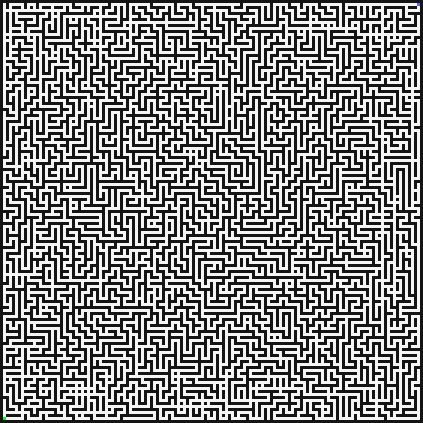

In [103]:
_ = day16c_part2(puzzle.input, visualize=True)  # ~4 s.
hh.display_html("We visualize Part 2, backtracking from 'E' to 'S' as a depth-first recursion.")

In [104]:
@numba.njit
def day16_jit(grid, ys, xs, ye, xe, part2):  # Fastest.
  state = ys, xs, 0  # y, x, direction (0=E, 1=N, 2=W, 3=S).
  distance = np.full((*grid.shape, 4), 10**9)  # For Dijkstra.
  distance[state] = 0
  pq = [(0, *state)]  # distance, y, x, direction.
  found_d = 10**9  # Shortest distance to the end, if found.

  while pq:
    d, y, x, direction = heapq.heappop(pq)
    if d > found_d:
      # return (grid == 'O').sum()
      count = 0
      for row in grid:
        for ch in row:
          count += ch == 'O'
      return count
    if (y, x) == (ye, xe):
      if not part2:
        return d
      found_d = d
      stack = [(y, x, direction)]
      while stack:
        y, x, direction = stack.pop()
        d = distance[y, x, direction]
        distance[y, x, direction] = 10**9  # For speedup.
        grid[y, x] = 'O'
        dy, dx = ((0, 1), (-1, 0), (0, -1), (1, 0))[direction]
        for d, y, x, direction in (
            (d - 1, y - dy, x - dx, direction),
            (d - 1000, y, x, (direction + 3) % 4),
            (d - 1000, y, x, (direction + 1) % 4),
        ):
          if d == distance[y, x, direction]:
            stack.append((y, x, direction))
      continue

    dy, dx = ((0, 1), (-1, 0), (0, -1), (1, 0))[direction]
    for d2, y2, x2, direction2 in (
        (d + 1, y + dy, x + dx, direction),
        (d + 1000, y, x, (direction + 1) % 4),
        (d + 1000, y, x, (direction + 3) % 4),
    ):
      if grid[y2, x2] != '#' and d2 < distance[y2, x2, direction2]:
        distance[y2, x2, direction2] = d2
        heapq.heappush(pq, (d2, y2, x2, direction2))


def day16(s, *, part2=False):
  grid = np.array([list(line) for line in s.splitlines()])
  ((ys, xs),) = np.argwhere(grid == 'S')
  ((ye, xe),) = np.argwhere(grid == 'E')
  return day16_jit(grid, ys, xs, ye, xe, part2)


check_eq(day16(s1), 7036)
check_eq(day16(s2), 11048)
puzzle.verify(1, day16)

day16_part2 = functools.partial(day16, part2=True)
check_eq(day16_part2(s1), 45)
check_eq(day16_part2(s2), 64)
puzzle.verify(2, day16_part2)

(Part 1: 0.007 s)
(Part 2: 0.008 s)


<a name="day17"></a>
## Day 17: 3-bit program quine

- Part 1: Given a program for a 3-bit computer, what do you get if you use commas to join the values it outputs into a single string?

- Part 2: What is the lowest positive initial value for register A that causes the program to output a copy of itself?

In [105]:
puzzle = advent.puzzle(day=17)

For [day 17](https://adventofcode.com/2024/day/17), `puzzle.input` has 5 lines:

Register A: 44348299
Register B: 0
Register C: 0

Program: 2,4,1,5,7,5,1,6,0,3,4,2,5,5,3,0


The stored answers are: `{1: '6,5,4,7,1,6,0,3,1', 2: '106086382266778'}`

In [106]:
s1 = """\
Register A: 729
Register B: 0
Register C: 0

Program: 0,1,5,4,3,0
"""
# L0:  a = a // 2
#      output(a % 8)
#      jnz L0

In [107]:
s2 = """\
Register A: 2024
Register B: 0
Register C: 0

Program: 0,3,5,4,3,0
"""
# L0:  a = a // 8
#      output(a % 8)
#      jnz L0

In [108]:
def day17_part1(s):
  s_reg, s_prog = s.split('\n\n')
  registers = [int(line.split(': ')[1]) for line in s_reg.splitlines()]
  program = list(map(int, s_prog.split(': ')[1].split(',')))
  pc = 0
  outputs = []

  def combo(operand):
    if 0 <= operand <= 3:
      return operand
    if 4 <= operand <= 6:
      return registers[operand - 4]
    raise AssertionError

  while 0 <= pc < len(program) - 1:
    opcode, operand = program[pc], program[pc + 1]
    match opcode:
      case 0:  # adv
        registers[0] = registers[0] // 2 ** combo(operand)
      case 1:  # bxl
        registers[1] = registers[1] ^ operand
      case 2:  # bst
        registers[1] = combo(operand) % 8
      case 3:  # jnz
        if registers[0] != 0:
          pc = operand - 2
      case 4:  # bxc
        registers[1] = registers[1] ^ registers[2]
      case 5:  # out
        outputs.append(combo(operand) % 8)
      case 6:  # bdv
        registers[1] = registers[0] // 2 ** combo(operand)
      case 7:  # cdv
        registers[2] = registers[0] // 2 ** combo(operand)
      case _:
        raise AssertionError
    pc += 2

  return ','.join(str(output) for output in outputs)


check_eq(day17_part1(s1), '4,6,3,5,6,3,5,2,1,0')
puzzle.verify(1, day17_part1)

(Part 1: 0.000 s)


In [109]:
# 2, 4, 1, k1, 7, 5, 1, k2, 0, 3, 4, 2, 5, 5, 3, 0  # (k1=5, k2=6 in my puzzle input.)

#  0: 2, 4  b = a % 8
#  2: 1, k1 b = b ^ k1  # (5 in my puzzle input.)
#  4: 7, 5  c = a // 2 ** b
#  6: 1, 6  b = b ^ k2  # (6 in my puzzle input.)
#  8: 0, 3  a = a // 8
# 10: 4, 2  b = b ^ c
# 12: 5, 5  output b % 8
# 14: 3, 0  if a: jmp L0

In [110]:
# while a:
#   b = a & 7
#   b = b ^ k1
#   c = a >> b
#   b = b ^ k2
#   a = a >> 3
#   b = b ^ c
#   output(b & 7)

In [111]:
# while a:
#   b = a & 7
#   output((b ^ (k1 ^ k2) ^ (a >> (b ^ k1))) & 7)
#   a >>= 3

In [112]:
def day17a_part2(s):
  _, s_prog = s.split('\n\n')
  program = list(map(int, s_prog.split(': ')[1].split(',')))
  assert all(0 <= k < 8 for k in program)
  bst_index0, bst_index1 = (i for i in range(0, len(program), 2) if program[i] == 1)
  k1, k2 = program[bst_index0 + 1], program[bst_index1 + 1]  # (k1=5, k2=6 in my puzzle input.)
  big = 1 << 62
  min_a = big

  def explore(a, values):
    if not values:
      # hh.show(a)  # ~24 solutions.
      nonlocal min_a
      min_a = min(min_a, a)
      return
    a *= 8
    generated = [(b ^ k1 ^ k2 ^ ((a + b) >> (b ^ k1))) & 7 for b in range(8)]
    bs = [b for b in range(8) if generated[b] == values[0]]
    for b in bs:
      explore(a + b, values[1:])

  explore(0, program[::-1])
  return None if min_a == big else min_a


puzzle.verify(2, day17a_part2)

(Part 2: 0.001 s)


In [113]:
def day17_part2(s):
  program = list(map(int, s.split('Program: ')[1].split(',')))
  k1, k2 = (program[i + 1] for i in range(0, len(program), 2) if program[i] == 1)  # 'bst' params.

  def explore(a, values):
    if not values:
      return a
    solutions = (
        explore(a * 8 + b, values[1:])
        for b in range(8)
        if (b ^ k1 ^ k2 ^ ((a * 8 + b) >> (b ^ k1))) & 7 == values[0]
    )
    return min(solutions, default=1 << 62)

  return explore(0, program[::-1])


puzzle.verify(2, day17_part2)

(Part 2: 0.001 s)


In [114]:
# General solution using z3:
#  https://www.reddit.com/r/adventofcode/comments/1hg38ah/comment/m2if5s4/
#  https://gist.github.com/krystalgamer/ba7b2ebfa0a0c301c9285a85d0e088c0

In [115]:
# Space of possible inputs that look 'like' the ones the AOC website is giving us:
# https://www.reddit.com/r/adventofcode/comments/1hggduo/2024_day_17_part_2_a_challenging_test_case/
# ~207 possible quines.

<a name="day18"></a>
## Day 18: Iterative path blockers

- Part 1: After creating the first 1024 blockers in the grid, what is the minimum number of steps needed to go from (0, 0) to (70, 70)?

- Part 2: What are the coordinates of the first blocker that will prevent the exit from being reachable from your starting position?

In [116]:
puzzle = advent.puzzle(day=18)

For [day 18](https://adventofcode.com/2024/day/18), `puzzle.input` has 3_450 lines:

50,55
43,45
29,21
31,13
25,19
3,19
31,1
52,47
 ...
6,56
60,18
32,44
12,24


The stored answers are: `{1: '246', 2: '22,50'}`

In [117]:
s1 = """\
5,4
4,2
4,5
3,0
2,1
6,3
2,4
1,5
0,6
3,3
2,6
5,1
1,2
5,5
2,5
6,5
1,4
0,4
6,4
1,1
6,1
1,0
0,5
1,6
2,0
"""

In [118]:
def day18a(s, *, size=71, n_step=1024, part2=False):  # Brute-force.
  blocks = np.array([row.split(',') for row in s.splitlines()], int)[:, ::-1] + 1
  grid = np.pad(np.full((size, size), '.'), 1, constant_values='#')
  grid[tuple(blocks[:n_step].T)] = '#'

  def get_distance() -> int | None:
    yx, yxl = (1, 1), (size, size)
    visited = {yx}
    lst = [yx]
    for distance in itertools.count():
      lst2 = []
      for yx in lst:
        if yx == yxl:
          return distance
        y, x = yx
        for dy, dx in ((0, -1), (0, 1), (-1, 0), (1, 0)):
          yx2 = y + dy, x + dx
          if grid[yx2] == '.' and yx2 not in visited:
            visited.add(yx2)
            lst2.append(yx2)
      lst = lst2
      if not lst:
        break
    return None

  if not part2:
    return get_distance()

  for y, x in blocks[n_step:]:
    grid[y, x] = '#'
    if get_distance() is None:
      return f'{x - 1},{y - 1}'
  return None


check_eq(day18a(s1, size=7, n_step=12), 22)
puzzle.verify(1, day18a)

day18a_part2 = functools.partial(day18a, part2=True)
check_eq(day18a_part2(s1, size=7, n_step=12), '6,1')
# puzzle.verify(2, day18a_part2)  # Slow ~4.5s.

(Part 1: 0.006 s)


In [119]:
# Recompute only if the shortest path is broken.
def day18b(s, *, size=71, n_step=1024, part2=False, visualize=False, rep=4, fps=50, speed=4):
  blocks = np.array([row.split(',') for row in s.splitlines()], int)[:, ::-1] + 1
  grid = np.pad(np.full((size, size), '.'), 1, constant_values='#')
  grid[tuple(blocks[:n_step].T)] = '#'
  images = []

  def add_image(shortest_path, yx=None):
    if visualize:
      image = hh.to_image(grid == '#', 245, 0)
      if shortest_path:
        image[tuple(zip(*shortest_path))] = 120, 120, 255
      if yx:
        image[yx] = 255, 0, 0
      images.append(image.repeat(rep, 0).repeat(rep, 1))

  def get_shortest_path() -> list[tuple[int, int]]:
    yx, yxl = (1, 1), (size, size)
    parent = {yx: (-1, -1)}
    lst = [yx]
    while lst:
      lst2 = []
      for yx in lst:
        if yx == yxl:
          path = []
          while yx[0] >= 0:
            path.append(yx)
            yx = parent[yx]
          return path
        y, x = yx
        for dy, dx in ((0, -1), (0, 1), (-1, 0), (1, 0)):
          yx2 = y + dy, x + dx
          if grid[yx2] == '.' and yx2 not in parent:
            parent[yx2] = yx
            lst2.append(yx2)
      lst = lst2
    return []

  if not part2:
    return len(get_shortest_path()) - 1

  add_image(set())
  shortest_path = set(get_shortest_path())
  for t, (y, x) in enumerate(blocks[n_step:]):
    if t % speed == 0:
      add_image(shortest_path)
    grid[y, x] = '#'
    if (y, x) in shortest_path:
      shortest_path = set(get_shortest_path())
      if not shortest_path:
        if visualize:
          add_image(set(), (y, x))
          images = [images[0]] * fps + images + [images[-1]] * 2 * fps
          media.show_video(images, codec='gif', fps=fps, title='day18a')
        return f'{x - 1},{y - 1}'


check_eq(day18b(s1, size=7, n_step=12), 22)
puzzle.verify(1, day18b)

day18b_part2 = functools.partial(day18b, part2=True)
check_eq(day18b_part2(s1, size=7, n_step=12), '6,1')
puzzle.verify(2, day18b_part2)

(Part 1: 0.006 s)
(Part 2: 0.102 s)


day18a

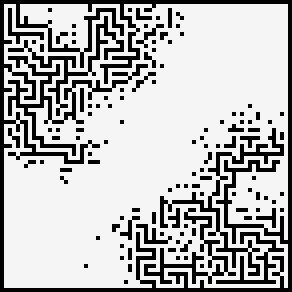

In [120]:
_ = day18b_part2(puzzle.input, visualize=True)

In [121]:
# We detect if there an 8-connected path between anywhere on the N,E boundaries and anywhere on
# the S,W boundaries.  If there is such a connected path, then we know that it prevents a
# 4-connected path from (0, 0) to (size - 1, size - 1).
# We iteratively consider each block yx, applying union_find.union(yx, yx2) with the special
# labels nw_boundary and se_boundary if yx is boundary-adjacent and with all its 8-connected
# neighboring blocks.
# After adding each block, we see if the two boundary components are now in the same connected set.
def day18_part2(s, *, size=71):
  blocks = (map(int, row.split(',')) for row in s.splitlines())
  union_find = hh.UnionFind[tuple[int, int]]()
  neighbors = set(itertools.product((-1, 0, 1), repeat=2)) - {(0, 0)}
  known_correct = set()
  nw_boundary, se_boundary = (-1, size), (size, -1)  # Arbitrary labels.
  for x, y in blocks:
    known_correct.add((y, x))
    for dy, dx in neighbors:
      y2, x2 = y + dy, x + dx
      if y2 < 0 or x2 >= size:
        union_find.union((y, x), nw_boundary)
      elif x2 < 0 or y2 >= size:
        union_find.union((y, x), se_boundary)
      elif (y2, x2) in known_correct:
        union_find.union((y, x), (y2, x2))
    if union_find.same(nw_boundary, se_boundary):
      return f'{x},{y}'


check_eq(day18_part2(s1, size=7), '6,1')
puzzle.verify(2, day18_part2)

(Part 2: 0.011 s)


day18b

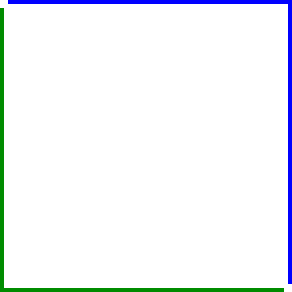

In [122]:
def day18_part2_visualize(s, *, size=71, rep=4, fps=50, speed=4):
  blocks = (map(int, row.split(',')) for row in s.splitlines())
  neighbors = set(itertools.product((-1, 0, 1), repeat=2)) - {(0, 0)}

  union_find = hh.UnionFind[tuple[int, int]]()
  nw_boundary, se_boundary = (-1, size), (size, -1)  # Arbitrary labels.
  known_correct = {nw_boundary, se_boundary}
  sets = {nw_boundary: {nw_boundary}, se_boundary: {se_boundary}}
  for i in range(size - 1):
    union_find.union(nw_boundary, (-1, i + 1))
    sets[nw_boundary].add((-1, i + 1))
    union_find.union(nw_boundary, (i, size))
    sets[nw_boundary].add((i, size))
    union_find.union(se_boundary, (i + 1, -1))
    sets[se_boundary].add((i + 1, -1))
    union_find.union(se_boundary, (size, i))
    sets[se_boundary].add((size, i))
  known_correct = set(sets[nw_boundary]) | set(sets[se_boundary])

  colors = hh.generate_random_colors(200, min_intensity=150, max_intensity=151)
  colors[hash(nw_boundary) % len(colors)] = 0, 0, 255
  colors[hash(se_boundary) % len(colors)] = 0, 140, 0
  images = []

  def add_image(yx=None):
    image = np.full((size + 2, size + 2, 3), 255, np.uint8)
    for y, x in known_correct:
      image[y + 1, x + 1] = colors[hash(union_find.find((y, x))) % len(colors)]
    if yx:
      y, x = yx
      image[y + 1, x + 1] = 255, 0, 0
    images.append(image.repeat(rep, 0).repeat(rep, 1))

  for t, (x, y) in enumerate(blocks):
    if t % speed == 0:
      add_image()
    known_correct.add((y, x))
    sets[y, x] = {(y, x)}
    for dy, dx in neighbors:
      y2, x2 = y + dy, x + dx
      if (y2, x2) in known_correct:
        # To reduce visualization flickering, we union into the larger of the two sets.
        y1, x1 = union_find.find((y, x))
        y2, x2 = union_find.find((y2, x2))
        if (y1, x1) != (y2, x2):
          if len(sets[y2, x2]) >= len(sets[y1, x1]):
            y1, x1, y2, x2 = y2, x2, y1, x1
          union_find.union((y1, x1), (y2, x2))
          old_set2 = sets.pop((y2, x2))
          sets[y1, x1] |= old_set2
          for _ in range(min(len(old_set2) // 8, 5)):
            add_image()
    if union_find.same(nw_boundary, se_boundary):
      add_image((y, x))
      images = [images[0]] * fps + images + [images[-1]] * 2 * fps
      media.show_video(images, codec='gif', fps=fps, title='day18b')
      return f'{x},{y}'


if 0:
  check_eq(day18_part2_visualize(s1, size=7, rep=10, fps=3, speed=1), '6,1')
check_eq(day18_part2_visualize(puzzle.input), day18_part2(puzzle.input))

<a name="day19"></a>
## Day 19: Assemble strings

- Part 1: Given a set of patterns and a set of designs, how many of the designs can be realized by concatenating any number of patterns?

- Part 2: What do you get if you add up the number of different ways you could make each design?

In [123]:
puzzle = advent.puzzle(day=19)

For [day 19](https://adventofcode.com/2024/day/19), `puzzle.input` has 402 lines:

grrg, buwuurr, w, bguwu, uuuu, wr, wuw, brbug, buwrg, wwr, uwr, buu, gurw, ubrgg ... rw, wgb, gg, bruwrbr, uugwgbgu, rru

burwurwrwgwbrbggruuuwwwuwuurgubwwguburrgbwgwbw
wgbgguwrrwrgwurrwrwrburrugrwgubruugbwgbruubuugrwwwrbw
buruggbwgrbwbrbrrrururbwrbburwuwwbrubrbgwgurrguggruubururr
wgwbwuuuwrwrrwbrbgugwbuwuubrurrgbbbgrurwuuwgbuwburbbgbg
uwwwurgwrwbguurgggrgbrwbwurrrwgbuwbuwrrrwwggwuwggggr
urgwguwgbrbbwwubwbguuwbrbugwrbwbrrrbgrgrubrwubb
 ...
gwgbbbwgrrbgugwwbbwuugwrwwbugbggbugrbgrgbrbur
buruguuwgrugbuwuwgrrgrbbuwbguwgguggubgbbguuggbgrrrwruur
buruwgbbgrwgwrbubggurbgrbrbbbugbrwbrbwrgr
buwburgwuuubwbwwuuruuwbbrwbrbwgwrwuuwggwwguuwurggrgggwbw


The stored answers are: `{1: '240', 2: '848076019766013'}`

In [124]:
s1 = """\
r, wr, b, g, bwu, rb, gb, br

brwrr
bggr
gbbr
rrbgbr
ubwu
bwurrg
brgr
bbrgwb
"""

In [125]:
def day19a(s, *, part2=False):  # Concise.
  p1, p2 = s.split('\n\n')
  towels = p1.split(', ')
  designs = p2.splitlines()

  def is_possible(design):
    if not design:
      return True
    for towel in towels:
      if design.startswith(towel) and is_possible(design[len(towel) :]):
        return True
    return False

  @functools.cache
  def num_possible(design):
    if not design:
      return 1
    count = 0
    for towel in towels:
      if design.startswith(towel):
        count += num_possible(design[len(towel) :])
    return count

  total = 0
  for design in designs:
    total += num_possible(design) if part2 else is_possible(design)

  return total


check_eq(day19a(s1), 6)
puzzle.verify(1, day19a)

day19a_part2 = functools.partial(day19a, part2=True)
check_eq(day19a_part2(s1), 16)
puzzle.verify(2, day19a_part2)

(Part 1: 0.036 s)
(Part 2: 0.209 s)


In [126]:
def day19b(s, *, part2=False):  # Faster using 1-character prefix buckets.
  p1, p2 = s.split('\n\n')
  towels = p1.split(', ')
  designs = p2.splitlines()

  towels_1ch_prefix = collections.defaultdict(list)
  for towel in towels:
    towels_1ch_prefix[towel[0]].append(towel)

  def is_possible(design):
    if not design:
      return True
    for towel in towels_1ch_prefix[design[0]]:
      if design.startswith(towel) and is_possible(design[len(towel) :]):
        return True
    return False

  @functools.cache
  def num_possible(design):
    if not design:
      return 1
    count = 0
    for towel in towels_1ch_prefix[design[0]]:
      if design.startswith(towel):
        count += num_possible(design[len(towel) :])
    return count

  total = 0
  for design in designs:
    total += num_possible(design) if part2 else is_possible(design)

  return total


check_eq(day19b(s1), 6)
puzzle.verify(1, day19b)

day19b_part2 = functools.partial(day19b, part2=True)
check_eq(day19b_part2(s1), 16)
puzzle.verify(2, day19b_part2)

(Part 1: 0.009 s)
(Part 2: 0.051 s)


In [127]:
def day19(s, *, part2=False):  # Faster using 2-character prefix buckets.
  p1, p2 = s.split('\n\n')
  towels = p1.split(', ')
  designs = p2.splitlines()

  towels_1ch = {towel for towel in towels if len(towel) == 1}
  towels_2ch_prefix = collections.defaultdict(list)
  for towel in towels:
    if len(towel) >= 2:
      towels_2ch_prefix[towel[:2]].append(towel)

  def is_possible(design):
    if not design:
      return True
    if design[0] in towels_1ch and is_possible(design[1:]):
      return True
    for towel in towels_2ch_prefix[design[:2]]:
      if design.startswith(towel) and is_possible(design[len(towel) :]):
        return True
    return False

  @functools.cache
  def num_possible(design):
    if not design:
      return 1
    count = 0
    if design[0] in towels_1ch:
      count += num_possible(design[1:])
    for towel in towels_2ch_prefix[design[:2]]:
      if design.startswith(towel):
        count += num_possible(design[len(towel) :])
    return count

  total = 0
  for design in designs:
    total += num_possible(design) if part2 else is_possible(design)

  return total


check_eq(day19(s1), 6)
puzzle.verify(1, day19)

day19_part2 = functools.partial(day19, part2=True)
check_eq(day19_part2(s1), 16)
puzzle.verify(2, day19_part2)

(Part 1: 0.002 s)
(Part 2: 0.018 s)


<a name="day20"></a>
## Day 20: Racing with cheats

- Part 1: Exactly once during a race, a program may disable collision detection for up to 2 picoseconds.  How many cheat "tunnels" would save you at least 100 picoseconds?

- Part 2: A cheat instead lasts at most 20 picoseconds.  How many cheat "tunnels" would save you at least 100 picoseconds?

In [128]:
puzzle = advent.puzzle(day=20)

For [day 20](https://adventofcode.com/2024/day/20), `puzzle.input` has 141 lines:

################################################################################ ... ###################################
#...#.....###.....#.......................###...#...#...#####...#.....#...#...#. ... ..#...###.......###...........#...#
#.#.#.###.###.###.#.#####################.###.#.#.#.#.#.#####.#.#.###.#.#.#.#.#. ... #.#.#.###.#####.###.#########.#.#.#
#.#.#...#.....#...#...#...#.....#.........#...#.#.#...#...#...#.#...#...#.#.#.#. ... #...#...#.#.....#...#.........#.#.#
#.#.###.#######.#####.#.#.#.###.#.#########.###.#.#######.#.###.###.#####.#.#.## ... #######.#.#.#####.###.#########.#.#
#.#...#.......#...###...#.#.#...#.#.....###...#.#.#...#...#...#.....#.....#.#.#. ... ....#...#.#.#...#.#...#...###...#.#
#.###.#######.###.#######.#.#.###.#.###.#####.#.#.#.#.#.#####.#######.#####.#.#. ... ###.#.###.#.#.#.#.#.###.#.###.###.#
#.#...###.....#...#.....#...#...#.#.#...#.....#.#...#.#.#...#.......#...#...#.#. ... ..#...#...#.#.#...#...#.#...#.#...#
 ...
#.#.#.#...#...#...#...#...#

The stored answers are: `{1: '1327', 2: '985737'}`

In [129]:
s1 = """\
###############
#...#...#.....#
#.#.#.#.#.###.#
#S#...#.#.#...#
#######.#.#.###
#######.#.#...#
#######.#.###.#
###..E#...#...#
###.#######.###
#...###...#...#
#.#####.#.###.#
#.#...#.#.#...#
#.#.#.#.#.#.###
#...#...#...###
###############
"""

In [130]:
def day20a(s, *, part2=False, min_savings=100):  # Dijkstra; use distance `dict`.
  grid = np.array([list(line) for line in s.splitlines()])
  ((ys, xs),) = np.argwhere(grid == 'S')
  ((ye, xe),) = np.argwhere(grid == 'E')
  neighbors = (0, -1), (0, 1), (-1, 0), (1, 0)

  def dijkstra(y0, x0, yl, xl):
    state = y0, x0
    distance = collections.defaultdict(lambda: 10**9)
    distance[state] = 0
    pq = [(0, state)]

    while pq:
      d, state = heapq.heappop(pq)
      y, x = state
      if state == (yl, xl):
        return distance
      for dy, dx in neighbors:
        d2, y2, x2 = d + 1, y + dy, x + dx
        if grid[y2, x2] != '#' and d2 < distance[y2, x2]:
          distance[y2, x2] = d2
          heapq.heappush(pq, (d2, (y2, x2)))
    raise AssertionError

  distance_from_s = dijkstra(ys, xs, ye, xe)
  distance_from_e = dijkstra(ye, xe, ys, xs)
  regular_d = distance_from_e[ys, xs]

  radius = 20 if part2 else 2
  count = 0
  for (y, x), d_from_s in distance_from_s.items():
    for dy in range(-radius, radius + 1):
      for dx in range(-radius + abs(dy), radius - abs(dy) + 1):
        dd = abs(dy) + abs(dx)
        y2, x2 = y + dy, x + dx
        new_d = d_from_s + dd + distance_from_e[y2, x2]
        savings = regular_d - new_d
        if savings >= min_savings:
          count += 1

  return count


check_eq(day20a(s1, min_savings=1), 44)
puzzle.verify(1, day20a)

day20a_part2 = functools.partial(day20a, part2=True)
check_eq(day20a_part2(s1, min_savings=50), 285)
# puzzle.verify(2, day20a_part2)  # ~2.2 s.

(Part 1: 0.081 s)


In [131]:
def day20b(s, *, part2=False, min_savings=100):  # Follow track; use distance grid.
  grid = np.array([list(line) for line in s.splitlines()])
  ((ys, xs),) = np.argwhere(grid == 'S')
  ((ye, xe),) = np.argwhere(grid == 'E')
  distance = np.where(grid == '#', -2, -1)
  neighbors = (0, -1), (0, 1), (-1, 0), (1, 0)

  d, y, x = 0, ys, xs
  distance[y, x] = d
  while (y, x) != (ye, xe):
    ((y, x),) = (yx2 for dy, dx in neighbors if distance[yx2 := (y + dy, x + dx)] == -1)
    distance[y, x] = d = d + 1

  radius = 20 if part2 else 2
  count = 0
  for (y, x), d in np.ndenumerate(distance):
    if d >= 0:
      for y2 in range(max(y - radius, 0), min(y + radius + 1, distance.shape[0] - 1)):
        radius_x = radius - abs(y2 - y)
        for x2 in range(max(x - radius_x, 0), min(x + radius_x + 1, distance.shape[1] - 1)):
          if (d2 := distance[y2, x2]) >= 0:
            savings = d2 - d - abs(y2 - y) - abs(x2 - x)
            if savings >= min_savings:
              count += 1

  return count


check_eq(day20b(s1, min_savings=1), 44)
puzzle.verify(1, day20b)

day20b_part2 = functools.partial(day20b, part2=True)
check_eq(day20b_part2(s1, min_savings=50), 285)
puzzle.verify(2, day20b_part2)

(Part 1: 0.058 s)
(Part 2: 1.505 s)


In [132]:
def day20c(s, *, part2=False, min_savings=100, visualize=False, rep=4):
  grid = np.array([list(line) for line in s.splitlines()])
  ((ys, xs),) = np.argwhere(grid == 'S')
  ((ye, xe),) = np.argwhere(grid == 'E')
  distance = np.where(grid == '#', -2, -1)
  neighbors = (0, -1), (0, 1), (-1, 0), (1, 0)

  d, y, x = 0, ys, xs
  distance[y, x] = d
  while (y, x) != (ye, xe):
    ((y, x),) = (yx2 for dy, dx in neighbors if distance[yx2 := (y + dy, x + dx)] == -1)
    distance[y, x] = d = d + 1

  radius = 20 if part2 else 2
  count = 0
  max_savings = (0, (0, 0), (0, 0))
  for (y, x), d in np.ndenumerate(distance):
    if d >= 0:
      for y2 in range(max(y - radius, 0), min(y + radius + 1, distance.shape[0] - 1)):
        radius_x = radius - abs(y2 - y)
        for x2 in range(max(x - radius_x, 0), min(x + radius_x + 1, distance.shape[1] - 1)):
          if (d2 := distance[y2, x2]) >= 0:
            savings = d2 - d - abs(y2 - y) - abs(x2 - x)
            if savings >= min_savings:
              count += 1
              if (state := (savings, (y, x), (y2, x2))) > max_savings:
                max_savings = state

  if visualize:
    image = hh.to_image(grid == '#', 250, 0)
    rgb_from_scalar = matplotlib.colormaps['cool']  # pytype: disable=module-attr
    path_length = distance[ye, xe]
    for (y, x), d in np.ndenumerate(distance):
      if d >= 0:
        frac = d / path_length
        image[y, x] = (np.array(rgb_from_scalar(frac)[:3]) * 255 + 0.5).astype(np.uint8)
    image[ys, xs] = image[ye, xe] = 255
    image = image.repeat(rep, 0).repeat(rep, 1)
    if 1:
      with hh.pil_draw(image) as draw:
        _, (y1, x1), (y2, x2) = max_savings
        f = lambda c: (c + 0.5) * rep - 0.5
        draw.line([(f(x1), f(y1)), (f(x2), f(y2))], fill=(255, 100, 100), width=rep)
        # (Drawing all shortcuts is too dense.)
    media.show_image(image, title='day20')
    hh.display_html('The orange segment is the "cheat tunnel" that provides the greatest savings.')

  return count


check_eq(day20c(s1, min_savings=1), 44)
puzzle.verify(1, day20c)

day20c_part2 = functools.partial(day20c, part2=True)
check_eq(day20c_part2(s1, min_savings=50), 285)
# puzzle.verify(2, day20c_part2)

(Part 1: 0.058 s)


day20

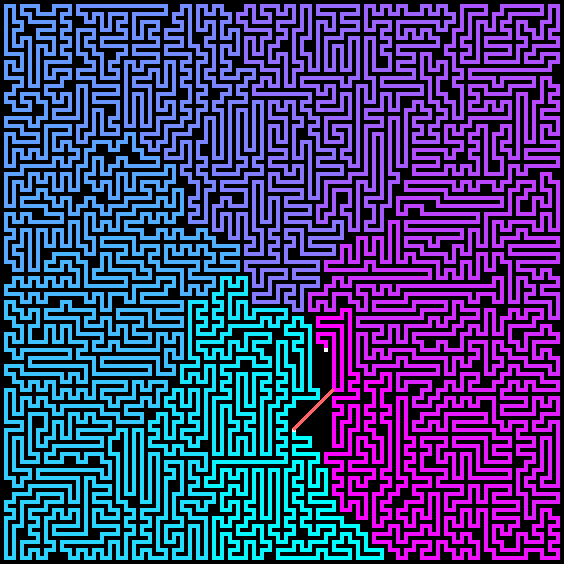

In [133]:
_ = day20c_part2(puzzle.input, visualize=True)

In [134]:
# Numpy "fully vectorized" solution using stride_tricks.  Not fastest.
def day20d(s, *, part2=False, min_savings=100):
  grid = np.array([list(line) for line in s.splitlines()])
  ((ys, xs),) = np.argwhere(grid == 'S')
  ((ye, xe),) = np.argwhere(grid == 'E')
  distance = np.where(grid == '#', -2, -1)
  neighbors = (0, -1), (0, 1), (-1, 0), (1, 0)

  d, y, x = 0, ys, xs
  distance[y, x] = d
  while (y, x) != (ye, xe):
    ((y, x),) = (yx2 for dy, dx in neighbors if distance[yx2 := (y + dy, x + dx)] == -1)
    distance[y, x] = d = d + 1

  radius = 20 if part2 else 2
  ny, nx = distance.shape

  # Create 2D manhattan distance array.
  y_grid, x_grid = np.indices((radius + 1, 2 * radius + 1))
  x_grid -= radius
  manhattan = abs(y_grid) + abs(x_grid)
  valid = (manhattan <= radius) & ((y_grid > 0) | (y_grid == 0) & (x_grid > 0))
  manhattan = np.where(valid, manhattan, -1)

  padded = np.pad(distance, radius, constant_values=-1)

  # Create a 4D view using stride_tricks.
  shifted_views = np.lib.stride_tricks.as_strided(
      padded[radius:],  # Start from the correct position.
      shape=(radius + 1, 2 * radius + 1, ny, nx),
      # pylint: disable-next=unsubscriptable-object
      strides=(padded.strides[0], padded.strides[1], padded.strides[0], padded.strides[1]),
      writeable=False,
  )
  manhattan_4d = manhattan[..., None, None]
  distance_4d = distance[None, None, :, :]
  valid_mask = manhattan_4d >= 0

  shifted_valid = shifted_views >= 0
  value_diff = np.abs(shifted_views - distance_4d)
  adjusted_diff = value_diff - manhattan_4d

  # Apply all conditions and sum.
  valid_pairs = (adjusted_diff >= min_savings) & (distance_4d >= 0) & shifted_valid & valid_mask

  return valid_pairs.sum()


check_eq(day20d(s1, min_savings=1), 44)
puzzle.verify(1, day20d)

day20d_part2 = functools.partial(day20d, part2=True)
check_eq(day20d_part2(s1, min_savings=50), 285)
puzzle.verify(2, day20d_part2)

(Part 1: 0.015 s)
(Part 2: 0.145 s)


In [135]:
# Numpy "fully vectorized" solution but using advanced indexing.  Not fastest.
def day20e(s, *, part2=False, min_savings=100):
  grid = np.array([list(line) for line in s.splitlines()])
  ((ys, xs),) = np.argwhere(grid == 'S')
  ((ye, xe),) = np.argwhere(grid == 'E')
  distance = np.where(grid == '#', -2, -1)
  neighbors = (0, -1), (0, 1), (-1, 0), (1, 0)

  d, y, x = 0, ys, xs
  distance[y, x] = d
  while (y, x) != (ye, xe):
    ((y, x),) = (yx2 for dy, dx in neighbors if distance[yx2 := (y + dy, x + dx)] == -1)
    distance[y, x] = d = d + 1

  radius = 20 if part2 else 2
  y, x = np.indices((radius + 1, 2 * radius + 1))
  x -= radius
  valid = (abs(y) + abs(x) <= radius) & ((y > 0) | (y == 0) & (x > 0))
  shifts = np.argwhere(valid)
  y_shifts = shifts[:, 0]
  x_shifts = shifts[:, 1] - radius
  manhattan = abs(y_shifts) + abs(x_shifts)

  padded = np.pad(distance, radius, constant_values=-1)

  # Create a view for vectorized shifting.
  ny, nx = distance.shape
  shifted_views = padded[
      radius + y_shifts[:, None, None] + np.arange(ny)[None, :, None],
      radius + x_shifts[:, None, None] + np.arange(nx)[None, None, :],
  ]

  # Create mask for valid (non-negative) values.
  valid_mask = distance >= 0
  shifted_valid = shifted_views >= 0

  # Calculate value differences and adjust by Manhattan distance.
  value_diff = np.abs(shifted_views - distance)
  adjusted_diff = value_diff - manhattan[:, None, None]

  # Count pairs satisfying all conditions.
  return ((adjusted_diff >= min_savings) & valid_mask & shifted_valid).sum()


check_eq(day20e(s1, min_savings=1), 44)
puzzle.verify(1, day20e)

day20e_part2 = functools.partial(day20e, part2=True)
check_eq(day20e_part2(s1, min_savings=50), 285)
puzzle.verify(2, day20e_part2)

(Part 1: 0.014 s)
(Part 2: 0.080 s)


In [136]:
# Numpy from https://github.com/lkesteloot/advent-of-code/blob/master/2024/20.py
def day20f(s, *, part2=False, min_savings=100):
  lines = s.splitlines()
  DELTA = (1, 0), (-1, 0), (0, 1), (0, -1)
  GRID = np.array([list(line) for line in lines])
  START = tuple(np.argwhere(GRID == 'S')[0])
  END = tuple(np.argwhere(GRID == 'E')[0])
  GRID[START] = '.'
  GRID[END] = '.'
  INF = GRID.shape[0] * GRID.shape[1]

  def add(p, d):
    return p[0] + d[0], p[1] + d[1]

  def first(d):
    return slice(1, -1 - d) if d >= 0 else second(-d)

  def second(d):
    return slice(1 + d, -1) if d >= 0 else first(-d)

  cheat_distance = 20 if part2 else 2

  distance = np.full(GRID.shape, INF)
  p = START
  for steps in itertools.count():
    distance[p] = steps
    if p == END:
      break
    for d in DELTA:
      n = add(p, d)
      if GRID[n] == '.' and distance[n] == INF:
        p = n
        break

  # Find all cheats.
  total = 0
  for dy in range(0, cheat_distance + 1):
    for dx in range(-cheat_distance + dy if dy > 0 else 0, cheat_distance + 1 - dy):
      manhattan = abs(dy) + abs(dx)
      a1 = distance[first(dy), first(dx)]
      a2 = distance[second(dy), second(dx)]
      both_open = (a1 < INF) & (a2 < INF)
      saved = np.abs(a1 - a2) - manhattan
      saved[~both_open] = 0
      total += np.count_nonzero(saved >= min_savings)

  return total


check_eq(day20f(s1, min_savings=1), 44)
puzzle.verify(1, day20f)

day20f_part2 = functools.partial(day20f, part2=True)
check_eq(day20f_part2(s1, min_savings=50), 285)
puzzle.verify(2, day20f_part2)

(Part 1: 0.014 s)
(Part 2: 0.047 s)


In [137]:
# Follow track; use distance grid; use symmetry for shortcut.  Fastest.
@numba.njit
def day20_jit(distance, ys, xs, ye, xe, part2, min_savings):
  d, y, x = 0, ys, xs
  distance[y, x] = d
  while (y, x) != (ye, xe):
    for y, x in ((y, x - 1), (y, x + 1), (y - 1, x), (y + 1, x)):
      if distance[y, x] == -1:
        break
    distance[y, x] = d = d + 1

  radius = 20 if part2 else 2
  count = 0
  for (y, x), d in np.ndenumerate(distance):
    if d >= 0:
      for y2 in range(y, min(y + radius + 1, distance.shape[0] - 1)):
        radius_x = radius - abs(y2 - y)
        xt = x - radius_x if y2 > y else x + 1
        for x2 in range(max(xt, 0), min(x + radius_x + 1, distance.shape[1] - 1)):
          d2 = distance[y2, x2]
          if d2 >= 0:
            savings = abs(d2 - d) - abs(y2 - y) - abs(x2 - x)
            if savings >= min_savings:
              count += 1

  return count


def day20(s, *, part2=False, min_savings=100):
  grid = np.array([list(line) for line in s.splitlines()])
  ((ys, xs),) = np.argwhere(grid == 'S')
  ((ye, xe),) = np.argwhere(grid == 'E')
  distance = np.where(grid == '#', -2, -1)
  return day20_jit(distance, ys, xs, ye, xe, part2, min_savings)


check_eq(day20(s1, min_savings=1), 44)
puzzle.verify(1, day20)

day20_part2 = functools.partial(day20, part2=True)
check_eq(day20_part2(s1, min_savings=50), 285)
puzzle.verify(2, day20_part2)

(Part 1: 0.002 s)
(Part 2: 0.006 s)


<a name="day21"></a>
## Day 21: Chain of keypads

- Part 1: There is one directional keypad that you are using, two directional keypads that robots are using, and one numeric keypad (on a door) that a robot is using.  For each numeric code, find the length of the shortest sequence of button presses you need to type on your directional keypad in order to cause the code to be typed on the numeric keypad.  What is the sum over the codes of the length of the shortest sequence and the numeric part of the code?

- Part 2: Increase the number of directional keypads that robots are using from 2 to 25.  What is the new sum?

In [138]:
puzzle = advent.puzzle(day=21)

For [day 21](https://adventofcode.com/2024/day/21), `puzzle.input` has 5 lines:

803A
528A
586A
341A
319A


The stored answers are: `{1: '184718', 2: '228800606998554'}`

In [139]:
s1 = """\
029A
980A
179A
456A
379A
"""

In [140]:
s2 = """\
029A: <vA<AA>>^AvAA<^A>A<v<A>>^AvA^A<vA>^A<v<A>^A>AAvA^A<v<A>A>^AAAvA<^A>A
980A: <v<A>>^AAAvA^A<vA<AA>>^AvAA<^A>A<v<A>A>^AAAvA<^A>A<vA>^A<A>A
179A: <v<A>>^A<vA<A>>^AAvAA<^A>A<v<A>>^AAvA^A<vA>^AA<A>A<v<A>A>^AAAvA<^A>A
456A: <v<A>>^AA<vA<A>>^AAvAA<^A>A<vA>^A<A>A<vA>^A<A>A<v<A>A>^AAvA<^A>A
379A: <v<A>>^AvA^A<vA<AA>>^AAvA<^A>AAvA^A<vA>^AA<A>A<v<A>A>^AAAvA<^A>A
"""

In [141]:
# Early greedy strategy that fails on puzzle input.
def day21_abandonned(s):
  yx_of_digit = dict(
      [('7', (0, 0)), ('8', (0, 1)), ('9', (0, 2)), ('4', (1, 0)), ('5', (1, 1)), ('6', (1, 2))]
      + [('1', (2, 0)), ('2', (2, 1)), ('3', (2, 2)), ('0', (3, 1)), ('A', (3, 2))]
  )
  yx_of_dir = dict([('^', (0, 1)), ('A', (0, 2)), ('<', (1, 0)), ('v', (1, 1)), ('>', (1, 2))])
  ch_digit_of_yx = {yx: ch for ch, yx in yx_of_digit.items()}
  ch_dir_of_yx = {yx: ch for ch, yx in yx_of_dir.items()}
  dyx_of_ch = {'^': (-1, 0), 'v': (1, 0), '<': (0, -1), '>': (0, 1)}

  def str_from_dyx(dy, dx, vertical_first):
    if vertical_first:
      return (
          ('v' * dy if dy > 0 else '^' * -dy if dy < 0 else '')
          + ('>' * dx if dx > 0 else '<' * -dx if dx < 0 else '')
          + 'A'
      )
    return (
        ('>' * dx if dx > 0 else '<' * -dx if dx < 0 else '')
        + ('v' * dy if dy > 0 else '^' * -dy if dy < 0 else '')
        + 'A'
    )

  def str_for_digit_str(code):
    str_parts = []
    y, x = yx_of_digit['A']
    for ch in code:
      y2, x2 = yx_of_digit[ch]
      dy, dx = y2 - y, x2 - x
      # horizontal_first = y < 3 and y2 == 3 and x == 0
      str1 = ''
      if 0:
        # Delay '^' as long as possible.  And delay '<' if possible?
        if y == 3 and dy < 0 and x2 == 0:
          if x == 2:
            str1 += '<'
            dx += 1
          str1 += '^'
          dy += 1
        vertical_first = False
      else:
        vertical_first = y == 3 and dy < 0 and x2 == 0
      str1 += str_from_dyx(dy, dx, vertical_first)
      str_parts.append(str1)
      y, x = y2, x2
    return ''.join(str_parts)

  def str_for_dir_str(code):
    str_parts = []
    y, x = yx_of_dir['A']
    for ch in code:
      y2, x2 = yx_of_dir[ch]
      dy, dx = y2 - y, x2 - x
      # horizontal_first = y == 1 and y2 == 0 and x == 0
      vertical_first = y == 0 and y2 == 1 and x2 == 0
      str_parts.append(str_from_dyx(dy, dx, vertical_first))
      y, x = y2, x2
    return ''.join(str_parts)

  def simulate_digit(s_in):
    s_out = ''
    y, x = yx_of_digit['A']
    for ch in s_in:
      if ch == 'A':
        s_out += ch_digit_of_yx[y, x]
      else:
        dy, dx = dyx_of_ch[ch]
        y, x = y + dy, x + dx
        assert (y, x) != (3, 0)
    return s_out

  def simulate_dir(s_in):
    s_out = ''
    y, x = yx_of_dir['A']
    for ch in s_in:
      if ch == 'A':
        s_out += ch_dir_of_yx[y, x]
      else:
        dy, dx = dyx_of_ch[ch]
        y, x = y + dy, x + dx
        assert (y, x) != (0, 0)
    return s_out

  if 0:
    for line in s2.splitlines():
      input, output = line.split(': ')
      hh.show(input, len(output))
      v3 = output
      v2 = simulate_dir(v3)
      v1 = simulate_dir(v2)
      v0 = simulate_digit(v1)
      hh.show(v3)
      hh.show(v2)
      hh.show(v1)
      hh.show(v0)

  total = 0
  for t0 in s.splitlines():
    t1 = str_for_digit_str(t0)
    t2 = str_for_dir_str(t1)
    t3 = str_for_dir_str(t2)
    # print(f'{t0 = }\n{t1 = }\n{t2 = }\n{t3 = }')
    complexity = len(t3) * int(t0.rstrip('A'))
    # print(f'{len(t3) = }')
    u2 = simulate_dir(t3)
    u1 = simulate_dir(u2)
    u0 = simulate_digit(u1)
    assert u0 == t0
    total += complexity

  return total


check_eq(day21_abandonned(s1), 126384)  # It works OK on sample input.
# puzzle.verify(1, day21_abandonned)  # It fails on `puzzle.input`.

In [142]:
# Some analysis of my failing output using an earlier `horizontal_first` scheme:
#      3           7                          9          A
#      ^A          ^^<<A                      >>A        vvvA
#      <A>A        <AAv<AA>>^A                vAA^A      v<AAA^>A
# MY : v<<A>>^AvA^Av<<A>>^AAv<A<A>>^AAvAA^<A>Av<A^>AA<A>Av<A<A>>^AAA<Av>A^A

#      3           7                      9          A
#      ^A          <<^^A                  >>A        vvvA
#      <A>A        v<<AA>^AA>A            vAA^A      <vAAA>^A
# MY:  v<<A>>^AvA^A<vA<AA>>^AAvA<^A>AAvA^A<vA>^AA<A>Av<<A>A>^AAAvA<^A>A
# REF: <v<A>>^AvA^A<vA<AA>>^AAvA<^A>AAvA^A<vA>^AA<A>A<v<A>A>^AAAvA<^A>A
#      <A>A        v<<AA>^AA>A            vAA^A      <vAAA>^A
#      ^A          <<^^A                  >>A        vvvA
#      3           7                      9          A

In [143]:
def day21b(s, *, part2=False):  # Slightly more expanded.
  yx_of_digit = dict(
      [('7', (0, 0)), ('8', (0, 1)), ('9', (0, 2)), ('4', (1, 0)), ('5', (1, 1)), ('6', (1, 2))]
      + [('1', (2, 0)), ('2', (2, 1)), ('3', (2, 2)), ('0', (3, 1)), ('A', (3, 2))]
  )
  yx_of_dir = dict([('^', (0, 1)), ('A', (0, 2)), ('<', (1, 0)), ('v', (1, 1)), ('>', (1, 2))])

  # Minimum length of the final code sequence to move from (y, x) to (y2, x2) on the digit keypad
  # given that the previous direction code (from the last directional keypad) was `last_dir_ch`.
  @functools.cache
  def digit_cost(y, x, y2, x2, last_dir_ch='A'):
    if (y, x) == (y2, x2):
      return dir_cost(*yx_of_dir[last_dir_ch], *yx_of_dir['A'])
    min_cost = 10**18
    if y != y2 and not (x == 0 and y2 == 3):  # Move up or down.
      y1, ch = (y + 1, 'v') if y2 > y else (y - 1, '^')
      cost1 = dir_cost(*yx_of_dir[last_dir_ch], *yx_of_dir[ch])
      min_cost = min(min_cost, cost1 + digit_cost(y1, x, y2, x2, ch))
    if x != x2 and not (y == 3 and x2 == 0):  # Move left or right.
      x1, ch = (x + 1, '>') if x2 > x else (x - 1, '<')
      cost1 = dir_cost(*yx_of_dir[last_dir_ch], *yx_of_dir[ch])
      min_cost = min(min_cost, cost1 + digit_cost(y, x1, y2, x2, ch))
    return min_cost

  # Minimum length of the final code sequence to move from (y, x) to (y2, x2) on the directional
  # keypad n_dir given that the previous direction code (from the prior directional keypad
  # n_dir - 1, if n_dir > 0) was `last_dir_ch`.
  @functools.cache
  def dir_cost(y, x, y2, x2, n_dir=25 if part2 else 2, last_dir_ch='A'):
    if n_dir == 0:
      return 1  # On the zero'th directional keypad, all codes cost exactly 1.
    if (y, x) == (y2, x2):
      return dir_cost(*yx_of_dir[last_dir_ch], *yx_of_dir['A'], n_dir - 1)  # Move to 'A'.
    min_cost = 10**18
    if y != y2 and not (x == 0 and y2 == 0):  # Move up or down.
      y1, ch = (y + 1, 'v') if y2 > y else (y - 1, '^')
      cost1 = dir_cost(*yx_of_dir[last_dir_ch], *yx_of_dir[ch], n_dir - 1) if n_dir else 0
      min_cost = min(min_cost, cost1 + dir_cost(y1, x, y2, x2, n_dir, ch))
    if x != x2 and not (y == 0 and x2 == 0):  # Move left or right.
      x1, ch = (x + 1, '>') if x2 > x else (x - 1, '<')
      cost1 = dir_cost(*yx_of_dir[last_dir_ch], *yx_of_dir[ch], n_dir - 1) if n_dir else 0
      min_cost = min(min_cost, cost1 + dir_cost(y, x1, y2, x2, n_dir, ch))
    return min_cost

  def code_cost(code):
    y, x = yx_of_digit['A']
    cost = 0
    for ch in code:
      y2, x2 = yx_of_digit[ch]
      cost += digit_cost(y, x, y2, x2)
      y, x = y2, x2
    return cost

  total = 0
  for code in s.splitlines():
    cost = code_cost(code)
    complexity = cost * int(code.rstrip('A'))
    total += complexity

  return total


check_eq(day21b(s1), 126384)
puzzle.verify(1, day21b)

day21b_part2 = functools.partial(day21b, part2=True)
puzzle.verify(2, day21b_part2)

(Part 1: 0.000 s)
(Part 2: 0.001 s)


In [144]:
def day21(s, *, part2=False):  # Concise
  yx_of_digit = dict(
      [('7', (0, 0)), ('8', (0, 1)), ('9', (0, 2)), ('4', (1, 0)), ('5', (1, 1)), ('6', (1, 2))]
      + [('1', (2, 0)), ('2', (2, 1)), ('3', (2, 2)), ('0', (3, 1)), ('A', (3, 2))]
  )
  yx_of_dir = dict([('^', (0, 1)), ('A', (0, 2)), ('<', (1, 0)), ('v', (1, 1)), ('>', (1, 2))])

  # Length of the shortest final sequence to move from (y, x) to (y2, x2) on the digit keypad
  # given that the previous direction code (from the last directional keypad) was `last_dir_ch`.
  def digit_cost(y, x, y2, x2, last_dir_ch='A'):
    if (y, x) == (y2, x2):
      return dir_cost(*yx_of_dir[last_dir_ch], *yx_of_dir['A'])
    min_cost = 10**18
    if y != y2 and not (x == 0 and y2 == 3):  # Move up or down.
      y1, ch = (y + 1, 'v') if y2 > y else (y - 1, '^')
      cost1 = dir_cost(*yx_of_dir[last_dir_ch], *yx_of_dir[ch])
      min_cost = min(min_cost, cost1 + digit_cost(y1, x, y2, x2, ch))
    if x != x2 and not (y == 3 and x2 == 0):  # Move left or right.
      x1, ch = (x + 1, '>') if x2 > x else (x - 1, '<')
      cost1 = dir_cost(*yx_of_dir[last_dir_ch], *yx_of_dir[ch])
      min_cost = min(min_cost, cost1 + digit_cost(y, x1, y2, x2, ch))
    return min_cost

  # Length of the shortest final sequence to move from (y, x) to (y2, x2) on the n_dir'th
  # directional keypad given that the previous direction code (from the prior directional
  # keypad n_dir - 1, if n_dir > 0) was `last_dir_ch`.
  @functools.cache
  def dir_cost(y, x, y2, x2, n_dir=25 if part2 else 2, last_dir_ch='A'):
    if n_dir == 0:
      return 1  # On the zero'th directional keypad, all codes cost exactly 1.
    if (y, x) == (y2, x2):
      return dir_cost(*yx_of_dir[last_dir_ch], *yx_of_dir['A'], n_dir - 1)  # Move to 'A'.
    min_cost = 10**18
    if y != y2 and not (x == 0 and y2 == 0):  # Move up or down.
      y1, ch = (y + 1, 'v') if y2 > y else (y - 1, '^')
      cost1 = dir_cost(*yx_of_dir[last_dir_ch], *yx_of_dir[ch], n_dir - 1)
      min_cost = min(min_cost, cost1 + dir_cost(y1, x, y2, x2, n_dir, ch))
    if x != x2 and not (y == 0 and x2 == 0):  # Move left or right.
      x1, ch = (x + 1, '>') if x2 > x else (x - 1, '<')
      cost1 = dir_cost(*yx_of_dir[last_dir_ch], *yx_of_dir[ch], n_dir - 1)
      min_cost = min(min_cost, cost1 + dir_cost(y, x1, y2, x2, n_dir, ch))
    return min_cost

  def code_cost(code):
    yxs = [yx_of_digit[ch] for ch in 'A' + code]
    return sum(digit_cost(*yx, *yx2) for yx, yx2 in itertools.pairwise(yxs))

  return sum(code_cost(code) * int(code.rstrip('A')) for code in s.splitlines())


check_eq(day21(s1), 126384)
puzzle.verify(1, day21)

day21_part2 = functools.partial(day21, part2=True)
puzzle.verify(2, day21_part2)

(Part 1: 0.000 s)
(Part 2: 0.001 s)


<a name="day22"></a>
## Day 22: Match pseudorandoms

- Part 1: For each buyer, simulate the creation of 2000 new secret numbers. What is the sum of the 2000th secret number generated by each buyer?

- Part 2: Find the best 4-long sequence of modulo-10 diffs so that by looking for that same sequence of changes in every buyer's future prices, you get the most bananas in total. What is the most bananas you can get?

In [145]:
puzzle = advent.puzzle(day=22)

For [day 22](https://adventofcode.com/2024/day/22), `puzzle.input` has 1_557 lines:

6731044
5953403
16612514
5099965
2695721
9419295
9708091
7902959
 ...
10906667
2035102
5037300
11233523


The stored answers are: `{1: '13234715490', 2: '1490'}`

In [146]:
s1 = """\
1
10
100
2024
"""

In [147]:
def day22a(s, *, part2=False):  # Concise.
  total = 0
  scores: Any = collections.defaultdict(int)
  secrets = np.empty(2001, np.int64)

  for v in map(int, s.splitlines()):
    for i in range(2001):
      secrets[i] = v
      v = ((v << 6) ^ v) & 0xFFFFFF
      v = ((v >> 5) ^ v) & 0xFFFFFF
      v = ((v << 11) ^ v) & 0xFFFFFF

    if not part2:
      total += secrets[-1]
      continue

    known_correct = set()
    diffs = np.diff(secrets % 10)
    for seq, value in zip(more_itertools.windowed(diffs, 4), secrets[4:]):
      if seq not in known_correct:
        known_correct.add(seq)
        scores[seq] += value % 10

  return max(scores.values()) if part2 else total


check_eq(day22a(s1), 37327623)
puzzle.verify(1, day22a)

day22a_part2 = functools.partial(day22a, part2=True)
puzzle.verify(2, day22a_part2)  # ~3 s.

(Part 1: 0.538 s)
(Part 2: 3.044 s)


In [148]:
def day22b(s, *, part2=False):  # Using only generators -- no lists or arrays.

  def generate_secrets(secret):
    for _ in range(2001):
      yield secret
      secret = ((secret << 6) ^ secret) & 0xFFFFFF
      secret = ((secret >> 5) ^ secret) & 0xFFFFFF
      secret = ((secret << 11) ^ secret) & 0xFFFFFF

  def changes(secrets):
    return (b % 10 - a % 10 for a, b in itertools.pairwise(secrets))

  initials = map(int, s.splitlines())

  if not part2:
    return sum(more_itertools.last(generate_secrets(initial)) for initial in initials)

  totals: Any = collections.defaultdict(int)

  for initial in initials:
    known_correct = set()
    secrets = generate_secrets(initial)
    it1, it2 = itertools.tee(secrets)
    windows = more_itertools.windowed(changes(it1), 4)
    scores = (secret % 10 for secret in itertools.islice(it2, 4, None))
    for window, score in zip(windows, scores):
      if window not in known_correct:
        known_correct.add(window)
        totals[window] += score

  return max(totals.values())


check_eq(day22b(s1), 37327623)
puzzle.verify(1, day22b)

day22b_part2 = functools.partial(day22b, part2=True)
puzzle.verify(2, day22b_part2)  # ~2 s.

(Part 1: 0.479 s)
(Part 2: 2.306 s)


In [149]:
# Numpy from https://github.com/lkesteloot/advent-of-code/blob/master/2024/22.py
def day22c(s, *, part2=False):
  INITIAL = np.array(s.splitlines(), int)

  def mix(a, b):
    return a ^ b

  def prune(a):
    return a % 16777216

  def get_next_secret(secret):
    secret = prune(mix(secret * 64, secret))
    secret = prune(mix(secret // 32, secret))
    secret = prune(mix(secret * 2048, secret))
    return secret

  count = len(INITIAL)
  secret = np.empty((count, 2001), np.int64)
  secret[:, 0] = INITIAL
  for i in range(2000):
    secret[:, i + 1] = get_next_secret(secret[:, i])

  if not part2:
    return secret[:, -1].sum()

  ones_digit = secret % 10
  diff = ones_digit[:, 1:] - ones_digit[:, :-1] + 9
  width = diff.shape[1]

  base = 9 * 2 + 1
  num_combos = base**4
  combos = np.zeros(num_combos, np.int64)
  coeff = base ** np.arange(4)

  first = np.full((count, num_combos), True)
  row_indices = np.arange(count)

  for i in range(width - 3):
    combo = np.inner(diff[:, i : i + 4], coeff)
    np.add.at(combos, combo, ones_digit[:, i + 4] * first[row_indices, combo])
    first[row_indices, combo] = False

  return np.max(combos)


check_eq(day22c(s1), 37327623)
puzzle.verify(1, day22c)

day22c_part2 = functools.partial(day22c, part2=True)
puzzle.verify(2, day22c_part2)

(Part 1: 0.046 s)
(Part 2: 0.307 s)


In [150]:
def day22d(s, *, part2=False, window_size=4, base=19):  # Fully vectorized numpy.
  vec = np.array(s.splitlines(), np.int64)
  n_inputs = len(vec)

  secret = np.empty((n_inputs, 2001), np.int64)
  for i in range(2001):
    secret[:, i] = vec
    vec = ((vec << 6) ^ vec) & 0xFFFFFF
    vec = ((vec >> 5) ^ vec) & 0xFFFFFF
    vec = ((vec << 11) ^ vec) & 0xFFFFFF

  if not part2:
    return secret[:, -1].sum()

  digit = secret % 10
  diffs2 = np.diff(digit, axis=1) + 9
  score = digit[:, 4:]

  # Create sliding windows along axis 1; shape=(n_inputs, 1997, 4).
  windows = np.lib.stride_tricks.sliding_window_view(diffs2, window_shape=window_size, axis=1)

  # Flatten each window into a scalar.
  windows_flat = np.einsum('ijk,k->ij', windows, base ** np.arange(4))

  # Create a mask identifying all the first occurrences in each row.
  index = np.argsort(windows_flat, axis=1, kind='stable')
  sorted_windows = np.take_along_axis(windows_flat, index, axis=1)
  is_different = np.diff(sorted_windows, axis=1, prepend=-1) != 0
  mask = np.empty_like(windows_flat, bool)
  np.put_along_axis(mask, index, is_different, axis=1)

  # Accumulate values into the totals array.
  rows, cols = mask.nonzero()
  flat_indices = windows_flat[rows, cols]
  values = score[rows, cols]

  totals = np.zeros(base**4, np.int64)
  np.add.at(totals, flat_indices, values)
  return totals.max()


check_eq(day22d(s1), 37327623)
puzzle.verify(1, day22d)

day22d_part2 = functools.partial(day22d, part2=True)
puzzle.verify(2, day22d_part2)

(Part 1: 0.023 s)
(Part 2: 0.233 s)


In [151]:
@numba.njit  # Using numba with arrays allocated outside the loop.
def day22_jit(values, part2):
  base = 19
  part1_total = 0
  scores = np.full(base**4, 0)
  known_correct = np.full(base**4, False)
  secrets = np.full(2001, 0)

  for value in values:
    for i in range(2001):
      secrets[i] = value
      value = ((value << 6) ^ value) & 0xFFFFFF
      value = ((value >> 5) ^ value) & 0xFFFFFF
      value = ((value << 11) ^ value) & 0xFFFFFF

    if not part2:
      part1_total += secrets[-1]
      continue

    known_correct[:] = False
    a = secrets[1] % 10 - secrets[0] % 10 + 9
    b = secrets[2] % 10 - secrets[1] % 10 + 9
    c = secrets[3] % 10 - secrets[2] % 10 + 9
    for i in range(2000 - 3):
      d = secrets[i + 4] % 10 - secrets[i + 3] % 10 + 9
      index = a * base**3 + b * base**2 + c * base**1 + d
      if not known_correct[index]:
        known_correct[index] = True
        scores[index] += secrets[i + 4] % 10
      a, b, c = b, c, d

  return scores.max() if part2 else part1_total


def day22(s, *, part2=False):
  values = list(map(int, s.splitlines()))
  return day22_jit(values, part2)


check_eq(day22(s1), 37327623)
puzzle.verify(1, day22)

day22_part2 = functools.partial(day22, part2=True)
puzzle.verify(2, day22_part2)

(Part 1: 0.006 s)
(Part 2: 0.022 s)


<a name="day23"></a>
## Day 23: Graph cliques

- Part 1: Find all the sets of three inter-connected computers. How many contain at least one computer with a name that starts with t?

- Part 2: Find the largest set of computers that are all connected to each other.  What is the name of every computer at the LAN party, sorted alphabetically, then joined together with commas?

In [152]:
puzzle = advent.puzzle(day=23)

For [day 23](https://adventofcode.com/2024/day/23), `puzzle.input` has 3_380 lines:

bd-fw
au-dc
py-ab
uy-nw
bx-fv
nu-ro
kw-gh
he-yn
 ...
ju-pp
nf-gw
zs-yy
qi-qv


The stored answers are: `{1: '1327', 2: 'df,kg,la,mp,pb,qh,sk,th,vn,ww,xp,yp,zk'}`

In [153]:
# spellcheck=off
s1 = """\
kh-tc
qp-kh
de-cg
ka-co
yn-aq
qp-ub
cg-tb
vc-aq
tb-ka
wh-tc
yn-cg
kh-ub
ta-co
de-co
tc-td
tb-wq
wh-td
ta-ka
td-qp
aq-cg
wq-ub
ub-vc
de-ta
wq-aq
wq-vc
wh-yn
ka-de
kh-ta
co-tc
wh-qp
tb-vc
td-yn
"""
# spellcheck=on

In [154]:
def day23a(s, *, part2=False):  # My own naive implementation to find all maximal cliques.
  graph = networkx.Graph()
  graph.add_edges_from(tuple(line.split('-')) for line in s.splitlines())

  def get_triangles(graph):
    for a in graph:
      for b in graph.neighbors(a):
        if b > a:
          for c in graph.neighbors(a):
            if c > b and graph.has_edge(b, c):
              yield a, b, c

  if not part2:
    # Note that enumerate_all_cliques() is slow as there are many more than just triangles.
    # triangles = (clique for clique in networkx.enumerate_all_cliques(graph) if len(clique) == 3)
    triangles = get_triangles(graph)
    return sum(1 for triangle in triangles if any(node[0] == 't' for node in triangle))

  def find_maximal_cliques(graph):
    # For each clique of size k, find superset cliques of size k + 1, or yield a maximal clique.
    # Then repeat for k + 1, etc.
    active_cliques = {(a,) for a in graph}
    while active_cliques:
      new_cliques = set()
      for clique in active_cliques:
        is_maximal = True
        for node in clique:
          for neighbor in graph.neighbors(node):
            if neighbor not in clique and all(graph.has_edge(neighbor, node2) for node2 in clique):
              new_clique = tuple(sorted(clique + (neighbor,)))
              new_cliques.add(new_clique)
              is_maximal = False
        if is_maximal:
          yield clique
      active_cliques = new_cliques

  if 0:
    counter = collections.Counter(len(clique) for clique in find_maximal_cliques(graph))
    print(sorted(counter.items()))
    # [(1, 2), (2, 21), (3, 11), (4, 1)]
    # [(1, 39), (2, 1154), (3, 4586), (4, 14047), (5, 27513), (6, 37600), (7, 36859),
    #  (8, 25964), (9, 12900), (10, 4314), (11, 893), (12, 90), (13, 1)]

  largest_clique = max(find_maximal_cliques(graph), key=len)
  return ','.join(sorted(largest_clique))


check_eq(day23a(s1), 7)
puzzle.verify(1, day23a)

day23a_part2 = functools.partial(day23a, part2=True)
check_eq(day23a_part2(s1), 'co,de,ka,ta')
# puzzle.verify(2, day23a_part2)  # Slow; ~12 s.

(Part 1: 0.011 s)


In [155]:
def day23b(s, *, part2=False):  # Using networkx.find_cliques().
  graph = networkx.Graph()
  graph.add_edges_from(tuple(line.split('-')) for line in s.splitlines())

  def get_triangles(graph):
    for a in graph:
      for b in graph.neighbors(a):
        if b > a:
          for c in graph.neighbors(a):
            if c > b and graph.has_edge(b, c):
              yield a, b, c

  if not part2:
    triangles = get_triangles(graph)
    return sum(1 for triangle in triangles if any(node[0] == 't' for node in triangle))

  # find_cliques = networkx.enumerate_all_cliques  # Slower because yields non-maximal cliques too.
  find_cliques = networkx.find_cliques
  largest_clique = max(find_cliques(graph), key=len)  # (Finds maximal cliques.)
  return ','.join(sorted(largest_clique))


check_eq(day23b(s1), 7)
puzzle.verify(1, day23b)

day23b_part2 = functools.partial(day23b, part2=True)
check_eq(day23b_part2(s1), 'co,de,ka,ta')
puzzle.verify(2, day23b_part2)

(Part 1: 0.010 s)
(Part 2: 0.009 s)


In [156]:
def day23b_part1(s):  # Faster for Part 1.
  graph = collections.defaultdict(set)
  for line in s.splitlines():
    a, b = line.split('-')
    graph[a].add(b)
    graph[b].add(a)

  count = 0
  for a in graph:
    for b in graph[a]:
      if b > a:
        for c in graph[a]:
          if c > b and c in graph[b] and any(n[0] == 't' for n in (a, b, c)):
            count += 1

  return count


check_eq(day23b_part1(s1), 7)
puzzle.verify(1, day23b_part1)

(Part 1: 0.007 s)


In [157]:
def day23c_part1(s):  # Fastest for Part 1.
  graph = collections.defaultdict(set)
  for line in s.splitlines():
    a, b = line.split('-')
    if a < b:
      graph[a].add(b)
      _ = graph[b]  # Be sure it contains at least an empty container.
    else:
      graph[b].add(a)
      _ = graph[a]

  count = 0
  for a in graph:
    for b in graph[a]:
      for c in graph[a]:
        if c > b and c in graph[b] and any(node[0] == 't' for node in (a, b, c)):
          count += 1

  return count


check_eq(day23c_part1(s1), 7)
puzzle.verify(1, day23c_part1)

(Part 1: 0.006 s)


In [158]:
def day23_visualize(s):
  graph = networkx.Graph()
  graph.add_edges_from(line.split('-') for line in s.splitlines())

  def get_triangles(graph):
    for a in graph:
      for b in graph.neighbors(a):
        if b > a:
          for c in graph.neighbors(a):
            if c > b and graph.has_edge(b, c):
              yield a, b, c

  triangles = get_triangles(graph)
  sought_triangles = [t for t in triangles if any(node[0] == 't' for node in t)]

  largest_clique = max(networkx.find_cliques(graph), key=len)

  pos = hh.graph_layout(graph, prog='neato')  # prog='dot' is slow and too elongated.
  mean_of_largest_clique = np.mean([pos[node] for node in largest_clique], axis=0)
  square_distance_from_mean = lambda node: ((pos[node] - mean_of_largest_clique) ** 2).sum()
  most_central_clique_node = min(largest_clique, key=square_distance_from_mean)
  pos = hh.rotate_layout_so_node_is_on_left(pos, most_central_clique_node)

  plot_args: Any = dict(figsize=(12, 12), dpi=80)
  draw_args = dict(node_size=60, width=0.3)

  if 1:  # First plot.
    fig, ax = plt.subplots(**plot_args)
    ax.set_aspect('equal')
    node_color = [('red' if node[0] == 't' else 'C0') for node in graph]
    networkx.draw(graph, pos, node_color=node_color, **draw_args)

    # Draw triangles.
    for triangle in sought_triangles:
      vertices = [pos[node] for node in triangle]
      # Create and add a semi-transparent triangle.
      poly = matplotlib.patches.Polygon(vertices, alpha=0.03, facecolor='green', edgecolor='none')
      ax.add_patch(poly)

    fig.tight_layout(pad=0)
    image1 = hh.bounding_crop(hh.image_from_plt(fig), (255, 255, 255), margin=5)
    plt.close(fig)

  if 1:  # Second plot.
    fig, ax = plt.subplots(**plot_args)
    ax.set_aspect('equal')
    node_color = [('red' if node in largest_clique else 'C0') for node in graph]
    networkx.draw(graph, pos, node_color=node_color, **draw_args)

    fig.tight_layout(pad=0)
    image2 = hh.bounding_crop(hh.image_from_plt(fig), (255, 255, 255), margin=5)
    plt.close(fig)

  if 0:
    media.show_images({'day23a': image1, 'day23b': image2}, height=80)
  assembled = hh.assemble_arrays([image1, image2], (1, 2), spacing=40, background=255)
  media.show_image(assembled, title='day23')


if SHOW_BIG_MEDIA:
  day23_visualize(puzzle.input)

Cached result:<br/>
<img src="results/day23.png"/>

<a name="day24"></a>
## Day 24: Ripple-carry adder

- Part 1: Simulate the system of gates and wires. What decimal number does it output on the wires whose names start with `z`?

- Part 2: The system you're simulating is trying to add two binary numbers `x` and `y`.  There are exactly four pairs of gates whose output wires have been swapped.  What do you get if you sort the names of the eight wires involved in a swap and then join those names with commas?

In [159]:
puzzle = advent.puzzle(day=24)

For [day 24](https://adventofcode.com/2024/day/24), `puzzle.input` has 313 lines:

x00: 1
x01: 0
x02: 1
x03: 1
x04: 0
x05: 0
x06: 1
x07: 1
 ...
kcv XOR pkr -> z24
x42 XOR y42 -> pvj
x40 AND y40 -> bst
svg AND fmt -> qnk


The stored answers are: `{1: '56620966442854', 2: 'chv,jpj,kgj,rts,vvw,z07,z12,z26'}`

In [160]:
s1 = """\
x00: 1
x01: 1
x02: 1
y00: 0
y01: 1
y02: 0

x00 AND y00 -> z00
x01 XOR y01 -> z01
x02 OR y02 -> z02
"""

In [161]:
# spellcheck=off
s2 = """\
x00: 1
x01: 0
x02: 1
x03: 1
x04: 0
y00: 1
y01: 1
y02: 1
y03: 1
y04: 1

ntg XOR fgs -> mjb
y02 OR x01 -> tnw
kwq OR kpj -> z05
x00 OR x03 -> fst
tgd XOR rvg -> z01
vdt OR tnw -> bfw
bfw AND frj -> z10
ffh OR nrd -> bqk
y00 AND y03 -> djm
y03 OR y00 -> psh
bqk OR frj -> z08
tnw OR fst -> frj
gnj AND tgd -> z11
bfw XOR mjb -> z00
x03 OR x00 -> vdt
gnj AND wpb -> z02
x04 AND y00 -> kjc
djm OR pbm -> qhw
nrd AND vdt -> hwm
kjc AND fst -> rvg
y04 OR y02 -> fgs
y01 AND x02 -> pbm
ntg OR kjc -> kwq
psh XOR fgs -> tgd
qhw XOR tgd -> z09
pbm OR djm -> kpj
x03 XOR y03 -> ffh
x00 XOR y04 -> ntg
bfw OR bqk -> z06
nrd XOR fgs -> wpb
frj XOR qhw -> z04
bqk OR frj -> z07
y03 OR x01 -> nrd
hwm AND bqk -> z03
tgd XOR rvg -> z12
tnw OR pbm -> gnj
"""
# spellcheck=on

In [162]:
def day24_parse_vals_and_expressions(s):
  p1, p2 = s.split('\n\n')
  vals = {k: int(v) for line in p1.splitlines() for k, v in (line.split(': '),)}

  @dataclasses.dataclass
  class Expression:
    op: str
    srcs: tuple[str, str]

  expressions = {
      dst: Expression(op, (src1, src2))
      for line in p2.splitlines()
      for src1, op, src2, dst in (re.findall(r'\w+', line),)
  }

  return vals, expressions

In [163]:
def day24_part1(s):
  vals, expressions = day24_parse_vals_and_expressions(s)

  uses_of = collections.defaultdict(list)
  for dst, expr in expressions.items():
    for src in expr.srcs:
      uses_of[src].append(dst)

  EVAL_OP = {'AND': operator.and_, 'OR': operator.or_, 'XOR': operator.xor}

  stack_dsts = list(expressions)
  while stack_dsts:
    dst = stack_dsts.pop()
    if dst not in vals:
      expr = expressions[dst]
      if all(src in vals for src in expr.srcs):
        vals[dst] = EVAL_OP[expr.op](*(vals[src] for src in expr.srcs))
        stack_dsts.extend(uses_of[dst])

  return sum(2 ** int(k[1:]) for k, v in vals.items() if k[0] == 'z' and v == 1)


check_eq(day24_part1(s1), 4)
check_eq(day24_part1(s2), 2024)
puzzle.verify(1, day24_part1)

(Part 1: 0.001 s)


In [164]:
def day24_part2(s, *, correct_to=1000, return_pairs=False):
  _, expressions = day24_parse_vals_and_expressions(s)
  n_z = sum(1 for dst in expressions if dst[0] == 'z')

  def orient(expr):  # Heuristically assign a canonical order for two expression operands.
    expr2 = expressions.get(expr.srcs[1], None)
    if expr.srcs[1][0] == 'x' or (expr2 and (expr2.op == 'XOR' or expr2.srcs[0][0] in 'xy')):
      expr.srcs = expr.srcs[::-1]

  def tree_is_correct(i):
    e = expressions[f'z{i:02}']
    if e.op == 'XOR' and all(n in expressions for n in e.srcs):
      e1, e2 = expressions[e.srcs[0]], expressions[e.srcs[1]]
      if e1.op == 'XOR' and e1.srcs[0][0] == 'x':
        if e2.op == 'OR' and all(n in expressions for n in e2.srcs):
          e21, e22 = expressions[e2.srcs[0]], expressions[e2.srcs[1]]
          if e21.op == 'AND' and e21.srcs[0][0] == 'x':
            last_e = expressions[f'z{i - 1:02}']
            if i <= 2 or e22.op == 'AND' and set(e22.srcs) == set(last_e.srcs):
              return True
    return False

  for expr in expressions.values():
    orient(expr)
  known_correct = set[str]()
  pairs = []

  for i in range(n_z):

    def local_nodes(i: int) -> Iterator[str]:
      seen = known_correct | set(expressions[f'z{i - 1:02}'].srcs)

      def recurse(dst: str) -> Iterator[str]:
        seen.add(dst)
        yield dst
        expr = expressions[dst]
        for n in expr.srcs:
          if n in expressions and n not in seen:
            yield from recurse(n)

      yield from recurse(f'z{i:02}')

    def locally_orient(i: int) -> None:
      for dst in local_nodes(i):
        orient(expressions[dst])

    def swap(dst1: str, dst2: str) -> None:
      expressions[dst1], expressions[dst2] = expressions[dst2], expressions[dst1]
      locally_orient(i)
      locally_orient(i + 1)

    if 2 <= i < n_z - 2:

      if i <= correct_to and not tree_is_correct(i):
        # print(f'Problem at z{i:02}.')
        # We consider exchanging each pair within a set of local nodes, specifically those
        # contributing to the outputs i and i + 1, as this seems to be the puzzle pattern.
        dsts = set(local_nodes(i)) | set(local_nodes(i + 1))
        for dst1, dst2 in itertools.combinations(dsts, 2):
          swap(dst1, dst2)
          if tree_is_correct(i) and tree_is_correct(i + 1):
            # print(f'At {i=}, found a correcting pair {dst1}, {dst2}.')
            pairs.append((dst1, dst2))
            break
          swap(dst1, dst2)  # Swap back since it did not solve it.
        else:
          raise AssertionError(f'Could not find repair for z{i:02}')

      known_correct.update(local_nodes(i))

  return pairs if return_pairs else ','.join(sorted(itertools.chain.from_iterable(pairs)))


puzzle.verify(2, day24_part2)

(Part 2: 0.003 s)


In [165]:
def day24_part2_examine(s, *, correct_to=1000, truncated=False):
  if correct_to > 0:
    swapped_pairs = day24_part2(s, correct_to=correct_to, return_pairs=True)
    for n1, n2 in swapped_pairs:
      s = s.replace(f'-> {n1}', 'Z').replace(f'-> {n2}', f'-> {n1}').replace('Z', f'-> {n2}')

  vals, expressions = day24_parse_vals_and_expressions(s)

  n_x = sum(1 for k in vals if k[0] == 'x')
  n_y = sum(1 for k in vals if k[0] == 'y')
  n_z = sum(1 for dst in expressions if dst[0] == 'z')
  hh.display_html(f'{n_x=} {n_y=} {n_z=}')
  hh.display_html(f'{len(expressions)=}, compared to {(2 + (n_z - 2) * 5 + 0)=}')

  def orient(expr):  # Heuristically assign a canonical order for two expression operands.
    expr2 = expressions.get(expr.srcs[1], None)
    if expr.srcs[1][0] == 'x' or expr2 and (expr2.op == 'XOR' or expr2.srcs[0][0] in 'xy'):
      expr.srcs = expr.srcs[::-1]

  for expr in expressions.values():
    orient(expr)

  seen = set()

  for i in range(6 if truncated else n_z):
    output = f'z{i:02}'

    def follow_input(dst, level):
      if dst[0] not in 'xy':
        seen.add(dst)
        expr = expressions[dst]
        op, src1, src2 = expr.op, expr.srcs[0], expr.srcs[1]
        hh.display_html(f'<code>{"  " * level}{dst} <- {src1} {op} {src2}</code><br/>')
        for src in [src1, src2]:
          if src not in seen:
            follow_input(src, level + 1)

    follow_input(output, 0)


day24_part2_examine(puzzle.input, truncated=True)

day24

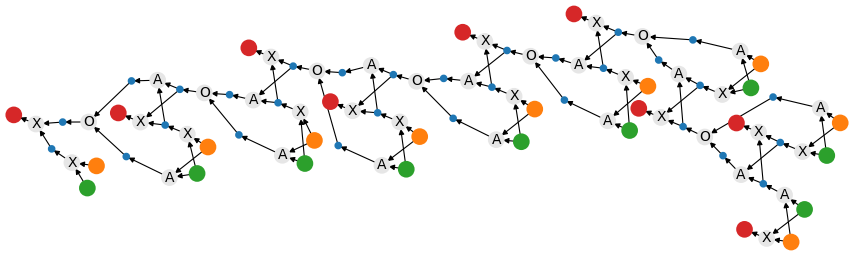

In [166]:
def day24_visualize(s, *, correct_to=1000, truncated=True):
  swapped_pairs = day24_part2(s, correct_to=correct_to, return_pairs=True)
  for n1, n2 in swapped_pairs:
    s = s.replace(f'-> {n1}', 'Z').replace(f'-> {n2}', f'-> {n1}').replace('Z', f'-> {n2}')

  _, expressions = day24_parse_vals_and_expressions(s)

  if truncated:
    seen = set()
    for i in range(9):
      output = f'z{i:02}'

      def follow_input(dst):
        if dst[0] not in 'xy':
          seen.add(dst)
          expr = expressions[dst]
          for src in expr.srcs:
            if src not in seen:
              follow_input(src)

      follow_input(output)

    expressions = {n: expr for n, expr in expressions.items() if n in seen}

  graph = networkx.DiGraph()
  for dst, expr in expressions.items():
    middle = f'{expr.op}-{expr.srcs[0]}-{expr.srcs[1]}'
    graph.add_edge(expr.srcs[0], middle)
    graph.add_edge(expr.srcs[1], middle)
    graph.add_edge(middle, dst)

  pos = hh.graph_layout(graph, prog='dot')  # Or prog='neato'.
  pos = hh.rotate_layout_so_principal_component_is_on_x_axis(pos)
  fig, ax = plt.subplots(figsize=(5, 10) if truncated else (20, 40), dpi=200)
  ax.set_aspect('equal')
  gray = (0.9,) * 3
  colors = dict(x='C1', y='C2', z='C3', A=gray, O=gray, X=gray)
  node_color = [colors.get(node[0], 'C0') for node in graph]
  labels = {node: node[0] for node in graph if node[0] in 'AOX'}
  node_size = [(25 if node[0] in 'xyzAOX' else 3) for node in graph]
  args = dict(width=0.4, arrowsize=4, labels=labels, font_size=5)
  networkx.draw(graph, pos, node_color=node_color, node_size=node_size, **args)
  fig.tight_layout(pad=0)
  image = hh.bounding_crop(hh.image_from_plt(fig), (255, 255, 255), margin=5)
  media.show_image(image, title='day24')
  plt.close(fig)


day24_visualize(puzzle.input)

<a name="day25"></a>
## Day 25: Compatible keys & locks

- Part 1: How many unique lock/key pairs fit together without overlapping in any column?

- Part 2: None.

In [13]:
puzzle = advent.puzzle(day=25)

For [day 25](https://adventofcode.com/2024/day/25), `puzzle.input` has 3_999 lines:

.....
.....
.#...
##...
###.#
###.#
#####

 ...
#.#..
#.#..
#.#.#
#####


The stored answers are: `{1: '3223', 2: ''}`

In [14]:
s1 = """\
#####
.####
.####
.####
.#.#.
.#...
.....

#####
##.##
.#.##
...##
...#.
...#.
.....

.....
#....
#....
#...#
#.#.#
#.###
#####

.....
.....
#.#..
###..
###.#
###.#
#####

.....
.....
.....
#....
#.#..
#.#.#
#####
"""

In [15]:
def day25a_part1(s):  # Concise.
  Part = tuple[int, int, int, int, int]  # Tuple of 5 digits, each in range(0, 6).
  parts: tuple[list[Part], list[Part]] = [], []
  for item in s.split('\n\n'):
    lines = item.splitlines()
    kind = int(lines[0] == '#####')
    part = tuple(sum(line[col] == '#' for line in lines) - 1 for col in range(5))
    parts[kind].append(part)

  return sum(
      1
      for part0, part1 in itertools.product(parts[0], parts[1])
      if all(a + b <= 5 for a, b in zip(part0, part1))
  )


check_eq(day25a_part1(s1), 3)
puzzle.verify(1, day25a_part1)

(Part 1: 0.024 s)


In [16]:
def day25_part1(s):  # Faster.
  Part = tuple[int, int, int, int, int]  # Tuple of 5 digits, each in range(0, 6).
  parts: tuple[list[Part], list[Part]] = [], []
  for item in s.split('\n\n'):
    lines = item.splitlines()
    kind = int(lines[0] == '#####')
    part = tuple(sum(line[col] == '#' for line in lines) - 1 for col in range(5))
    parts[kind].append(part)

  # We create a 2D table whose entry [col, j] contains the subset of parts[0] that have
  # digit 0 <= j <= 5 in column col.
  table: list[list[list[Part]]] = [[[] for _ in range(6)] for _ in range(5)]
  # table = tuple(tuple([] for _ in range(6)) for _ in range(5))  # Same speed.
  for part0 in parts[0]:
    for col, digit in enumerate(part0):
      table[col][digit].append(part0)

  count = 0
  # For each part in parts[1], we find the column containing the largest digit.  We then consider
  # only the parts in parts[0] whose digit in the corresponding column is sufficiently small.
  for part1 in parts[1]:
    col_largest = max(range(5), key=part1.__getitem__)
    for lst in table[col_largest][: -part1[col_largest]]:
      for part0 in lst:
        if all(a + b <= 5 for a, b in zip(part0, part1)):
          count += 1

  return count


check_eq(day25_part1(s1), 3)
puzzle.verify(1, day25_part1)

(Part 1: 0.008 s)


day25

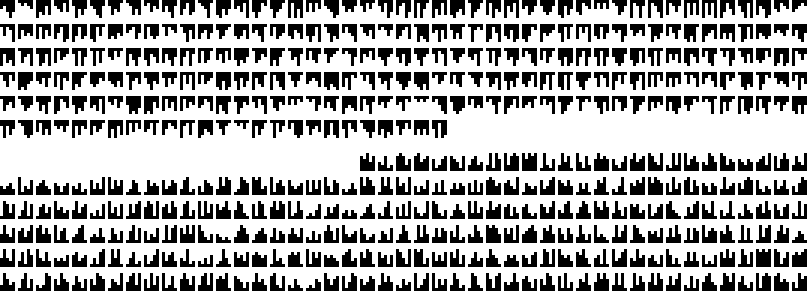

In [24]:
def day25_visualize(s, rep=3, background=255):
  parts_images: tuple[list[np.ndarray], list[np.ndarray]] = [], []
  for item in s.split('\n\n'):
    part = np.array([list(line) for line in item.splitlines()]) == '#'
    kind = part[0].all()
    # part = part[:-1] if kind else part[1:]
    part_image = hh.to_image(part, 0, 255).repeat(rep, 0).repeat(rep, 1)
    parts_images[int(kind)].append(part_image)

  n_cols = math.ceil(math.sqrt(sum(len(p) for p in parts_images)) * 2)
  images = []
  for kind in range(2):
    kwargs = dict(background=background, spacing=rep, from_end=kind > 0)
    images.append(hh.assemble_arrays(parts_images[kind], (-1, n_cols), **kwargs))
  image = hh.assemble_arrays(images, (2, 1), background=background, align='start', spacing=3 * rep)
  media.show_image(image, title='day25')


# day25_visualize(s1, rep=10)
day25_visualize(puzzle.input)

In [17]:
puzzle.verify(2, lambda s: '')  # (No "Part 2" on last day.)

(Part 2: 0.000 s)


<a name="timings"></a>
## Timings

In [172]:
advent.show_times()

day_1    part_1: 0.001   part_2: 0.001
day_2    part_1: 0.001   part_2: 0.007
day_3    part_1: 0.001   part_2: 0.001
day_4    part_1: 0.005   part_2: 0.004
day_5    part_1: 0.001   part_2: 0.001
day_6    part_1: 0.002   part_2: 0.008
day_7    part_1: 0.006   part_2: 0.061
day_8    part_1: 0.003   part_2: 0.003
day_9    part_1: 0.008   part_2: 0.015
day_10   part_1: 0.001   part_2: 0.000
day_11   part_1: 0.002   part_2: 0.064
day_12   part_1: 0.038   part_2: 0.045
day_13   part_1: 0.002   part_2: 0.002
day_14   part_1: 0.001   part_2: 0.005
day_15   part_1: 0.017   part_2: 0.042
day_16   part_1: 0.007   part_2: 0.008
day_17   part_1: 0.000   part_2: 0.001
day_18   part_1: 0.006   part_2: 0.011
day_19   part_1: 0.002   part_2: 0.018
day_20   part_1: 0.002   part_2: 0.006
day_21   part_1: 0.000   part_2: 0.001
day_22   part_1: 0.006   part_2: 0.022
day_23   part_1: 0.006   part_2: 0.009
day_24   part_1: 0.001   part_2: 0.003
day_25   part_1: 0.008   part_2: 0.000
Total time:  0.460 s


In [173]:
if 0:  # Compute min execution times over several calls.
  advent.show_times(recompute=True, repeat=3)

In [174]:
if 1:  # Look for unwanted pollution of namespace.
  for _name in globals().copy():
    if not (re.match(r'^(_.*|(day|Day)\d+.*|s\d+|puzzle)$', _name) or _name in _ORIGINAL_GLOBALS):
      print(_name)

In [175]:
if 0:  # Lint.
  hh.run('echo pyink; pyink --diff .')
  hh.run('echo autopep8; autopep8 -j8 -d .')
  hh.run('echo mypy; mypy . || true')
  hh.run('echo pylint; pylint -j8 . || true')
  hh.run('echo pytype; pytype -j auto -k .')
  hh.run(
      'echo flake8; flake8 --indent-size=2 --exclude .ipynb_checkpoints'
      ' --extend-ignore E129,E203,E302,E305,E501,E741'
  )

In [176]:
hh.show_notebook_cell_top_times()

# Total time: 72.64 s
# In[ 96] _ = day15(puzzle.input, visualize=True)  # ~5 s.\n_ = day15 12.669 s
# In[ 40] # For Part 2, (1) precompute a jump map and (2) march       11.009 s
# In[122] def day18_part2_visualize(s, *, size=71, rep=4, fps=50,      3.967 s
# In[147] def day22a(s, *, part2=False):  # Concise.\n  total = 0\n    3.850 s
# In[103] _ = day16c_part2(puzzle.input, visualize=True)  # ~4 s.      3.773 s
# In[148] def day22b(s, *, part2=False):  # Using only generators --   3.045 s
# In[ 65] @numba.njit\ndef day10c_jit(grid, part2):  # Numba           2.431 s
# In[131] def day20b(s, *, part2=False, min_savings=100):  # Follow    1.819 s
# In[133] _ = day20c_part2(puzzle.input, visualize=True)               1.750 s
# In[ 41] def day6_visualize(s, rep=2, fps=50):\n  grid = np.array([   1.531 s
# In[120] _ = day18b_part2(puzzle.input, visualize=True)               1.504 s
# In[ 60] def day9_part2_visualization(s, rep=1):\n  values = list(    1.214 s
# In[ 80] _ = day12(puzzle.inp

# End

<!-- For Emacs:
Local Variables:
fill-column: 100
End:
-->